# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(1x1)_120k_Files.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(1x1)_120k_Files.pickle","rb"))

In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [59977 60028]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 50.021249114620225


 # 23k Set

In [37]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:5]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:17000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[17000:19500]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[19500:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
(17000, 10, 16, 2) (2500, 10, 16, 2) (4052, 10, 16, 2)


## 120k Set

In [4]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:5]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(85000, 3, 8, 2) (20000, 3, 8, 2) (15005, 3, 8, 2)


## Split into Charge and Time

In [ ]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,9,24,1)
XTestT = XTest[:,:,:,1].reshape(4052,9,24,1)
XValT = XVal[:,:,:,1].reshape(2500,9,24,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,9,24,1)
XTestC = XTest[:,:,:,0].reshape(4052,9,24,1)
XValC = XVal[:,:,:,0].reshape(2500,9,24,1)

# Testen der besten Methode

In [5]:
XTraining.shape

(85000, 3, 8, 2)

In [6]:
Tiefe = [1,2,3]
Batchgrose = [128]
Breite = [10,24,50,160,600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD1x1Perceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)



W0528 16:54:40.024735 24064 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 3, 8, 2)]         0         
_________________________________________________________________
flatten (Flatten)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                490       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 552
Trainable params: 532
Non-trainable params: 20
______________________________________________________________

85000/85000 [==============================] - 2s 27us/sample - loss: 0.6043 - acc: 0.6784 - val_loss: 0.6018 - val_acc: 0.6770
Epoch 13/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.6033 - acc: 0.6796 - val_loss: 0.5999 - val_acc: 0.6795
Epoch 14/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.6013 - acc: 0.6810 - val_loss: 0.5966 - val_acc: 0.6806
Epoch 15/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.5994 - acc: 0.6847 - val_loss: 0.5939 - val_acc: 0.6850
Epoch 16/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.5972 - acc: 0.6863 - val_loss: 0.5907 - val_acc: 0.6882
Epoch 17/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.5942 - acc: 0.6881 - val_loss: 0.5878 - val_acc: 0.6874
Epoch 18/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.5921 - acc: 0.6913 - val_loss: 0.5831 - val_acc: 0.6956
Epoch 19/30
85000/85000 [=======

Epoch 1/30
85000/85000 [==============================] - 3s 31us/sample - loss: 0.6367 - acc: 0.6540 - val_loss: 0.7491 - val_acc: 0.5316
Epoch 2/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.6146 - acc: 0.6696 - val_loss: 0.6546 - val_acc: 0.6220
Epoch 3/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.6123 - acc: 0.6711 - val_loss: 0.6277 - val_acc: 0.6457
Epoch 4/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.6115 - acc: 0.6719 - val_loss: 0.6229 - val_acc: 0.6547
Epoch 5/30
85000/85000 [==============================] - 2s 29us/sample - loss: 0.6112 - acc: 0.6727 - val_loss: 0.6178 - val_acc: 0.6608
Epoch 6/30
85000/85000 [==============================] - 2s 29us/sample - loss: 0.6105 - acc: 0.6736 - val_loss: 0.6198 - val_acc: 0.6593
Epoch 7/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.6098 - acc: 0.6728 - val_loss: 0.6164 - val_acc: 0.6601
Epoch 8/30
85000/85000 [===

85000/85000 [==============================] - 2s 28us/sample - loss: 0.6032 - acc: 0.6806 - val_loss: 0.6037 - val_acc: 0.6752
Epoch 22/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.6010 - acc: 0.6807 - val_loss: 0.5984 - val_acc: 0.6800
Epoch 23/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.5982 - acc: 0.6845 - val_loss: 0.5976 - val_acc: 0.6798
Epoch 24/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.5948 - acc: 0.6888 - val_loss: 0.5912 - val_acc: 0.6866
Epoch 25/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.5913 - acc: 0.6910 - val_loss: 0.5842 - val_acc: 0.6946
Epoch 26/30
85000/85000 [==============================] - 2s 28us/sample - loss: 0.5871 - acc: 0.6941 - val_loss: 0.5793 - val_acc: 0.6968
Epoch 27/30
85000/85000 [==============================] - 2s 27us/sample - loss: 0.5846 - acc: 0.6968 - val_loss: 0.5793 - val_acc: 0.6966
Epoch 28/30
85000/85000 [=======

Epoch 1/30
85000/85000 [==============================] - 4s 45us/sample - loss: 0.6607 - acc: 0.6354 - val_loss: 0.6291 - val_acc: 0.6407
Epoch 2/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.6157 - acc: 0.6674 - val_loss: 0.6150 - val_acc: 0.6590
Epoch 3/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.6104 - acc: 0.6728 - val_loss: 0.6093 - val_acc: 0.6633
Epoch 4/30
85000/85000 [==============================] - 4s 43us/sample - loss: 0.6041 - acc: 0.6796 - val_loss: 0.6074 - val_acc: 0.6637
Epoch 5/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5990 - acc: 0.6852 - val_loss: 0.5978 - val_acc: 0.6722
Epoch 6/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5925 - acc: 0.6912 - val_loss: 0.5874 - val_acc: 0.6891
Epoch 7/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.5879 - acc: 0.6956 - val_loss: 0.5842 - val_acc: 0.6877
Epoch 8/30
85000/85000 [===

85000/85000 [==============================] - 4s 43us/sample - loss: 0.5405 - acc: 0.7320 - val_loss: 0.5311 - val_acc: 0.7280
Epoch 19/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5389 - acc: 0.7319 - val_loss: 0.5346 - val_acc: 0.7265
Epoch 20/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.5375 - acc: 0.7326 - val_loss: 0.5314 - val_acc: 0.7301
Epoch 21/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.5364 - acc: 0.7339 - val_loss: 0.5376 - val_acc: 0.7232
Epoch 22/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.5362 - acc: 0.7362 - val_loss: 0.5281 - val_acc: 0.7333
Epoch 23/30
85000/85000 [==============================] - 3s 38us/sample - loss: 0.5361 - acc: 0.7355 - val_loss: 0.5264 - val_acc: 0.7344
Epoch 24/30
85000/85000 [==============================] - 3s 39us/sample - loss: 0.5351 - acc: 0.7356 - val_loss: 0.5268 - val_acc: 0.7336
Epoch 25/30
85000/85000 [=======

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.6665 - acc: 0.6484 - val_loss: 0.7579 - val_acc: 0.5202
Epoch 2/30
85000/85000 [==============================] - 3s 41us/sample - loss: 0.5902 - acc: 0.6909 - val_loss: 0.8010 - val_acc: 0.5216
Epoch 3/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5557 - acc: 0.7187 - val_loss: 0.6189 - val_acc: 0.6375
Epoch 4/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5360 - acc: 0.7331 - val_loss: 0.5550 - val_acc: 0.7095
Epoch 5/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5255 - acc: 0.7397 - val_loss: 0.5218 - val_acc: 0.7387
Epoch 6/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5165 - acc: 0.7451 - val_loss: 0.5086 - val_acc: 0.7495
Epoch 7/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5083 - acc: 0.7498 - val_loss: 0.

85000/85000 [==============================] - 4s 52us/sample - loss: 0.5957 - acc: 0.6910 - val_loss: 0.5877 - val_acc: 0.6967
Epoch 16/30
85000/85000 [==============================] - 5s 56us/sample - loss: 0.5948 - acc: 0.6925 - val_loss: 0.5870 - val_acc: 0.6955
Epoch 17/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.5935 - acc: 0.6933 - val_loss: 0.5834 - val_acc: 0.7001
Epoch 18/30
85000/85000 [==============================] - 4s 52us/sample - loss: 0.5917 - acc: 0.6947 - val_loss: 0.5820 - val_acc: 0.7014
Epoch 19/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.5911 - acc: 0.6958 - val_loss: 0.5810 - val_acc: 0.7013
Epoch 20/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.5898 - acc: 0.6975 - val_loss: 0.5793 - val_acc: 0.7043
Epoch 21/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.5886 - acc: 0.6981 - val_loss: 0.5761 - val_acc: 0.7061
Epoch 22/30
85000/85000 [=======

85000/85000 [==============================] - 4s 53us/sample - loss: 0.5506 - acc: 0.7239 - val_loss: 0.5357 - val_acc: 0.7333
Epoch 30/30
85000/85000 [==============================] - 5s 55us/sample - loss: 0.5503 - acc: 0.7259 - val_loss: 0.5299 - val_acc: 0.7382
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 3, 8, 2)]         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 48)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 50)                2450      
_________________________________________________________________
batch_normalization_21 (Batc (None, 50)                200       
_________________________________________________________________
dropout_21 (Dropout)         (None, 50)                0 

Epoch 1/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.6593 - acc: 0.6478 - val_loss: 0.6545 - val_acc: 0.6142
Epoch 2/30
85000/85000 [==============================] - 5s 57us/sample - loss: 0.6007 - acc: 0.6809 - val_loss: 0.6578 - val_acc: 0.6192
Epoch 3/30
85000/85000 [==============================] - 5s 54us/sample - loss: 0.5807 - acc: 0.6963 - val_loss: 0.6524 - val_acc: 0.6370
Epoch 4/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.5623 - acc: 0.7127 - val_loss: 0.5852 - val_acc: 0.6798
Epoch 5/30
85000/85000 [==============================] - 4s 53us/sample - loss: 0.5485 - acc: 0.7234 - val_loss: 0.5592 - val_acc: 0.7031
Epoch 6/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.5398 - acc: 0.7302 - val_loss: 0.5454 - val_acc: 0.7167
Epoch 7/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.5329 - acc: 0.7363 - val_loss: 0.5353 - val_acc: 0.7255
Epoch 8/30
85000/85000 [===

85000/85000 [==============================] - 5s 55us/sample - loss: 0.4695 - acc: 0.7745 - val_loss: 0.4911 - val_acc: 0.7570
Epoch 16/30
85000/85000 [==============================] - 5s 54us/sample - loss: 0.4670 - acc: 0.7750 - val_loss: 0.4948 - val_acc: 0.7569
Epoch 17/30
85000/85000 [==============================] - 5s 58us/sample - loss: 0.4619 - acc: 0.7784 - val_loss: 0.4898 - val_acc: 0.7627
Epoch 18/30
85000/85000 [==============================] - 5s 55us/sample - loss: 0.4581 - acc: 0.7800 - val_loss: 0.4926 - val_acc: 0.7598
Epoch 19/30
85000/85000 [==============================] - 5s 54us/sample - loss: 0.4558 - acc: 0.7830 - val_loss: 0.4962 - val_acc: 0.7591
Epoch 20/30
85000/85000 [==============================] - 5s 54us/sample - loss: 0.4523 - acc: 0.7848 - val_loss: 0.4998 - val_acc: 0.7555
Epoch 21/30
85000/85000 [==============================] - 5s 54us/sample - loss: 0.4485 - acc: 0.7858 - val_loss: 0.4955 - val_acc: 0.7606
Epoch 22/30
85000/85000 [=======

In [14]:
Tiefe = [3]
Batchgrose = [128]
Breite = [600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD1x1Perceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            filepath="Perceptron_LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        #tensorboard 
            ],
          epochs= 20)



Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 3, 8, 2)]         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 48)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1600)              78400     
_________________________________________________________________
batch_normalization_33 (Batc (None, 1600)              6400      
_________________________________________________________________
dropout_33 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 1600)              2561600   
_________________________________________________________________
batch_normalization_34 (Batc (None, 1600)              6400  

In [51]:
XTraining.shape

(85000, 10, 16, 2)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


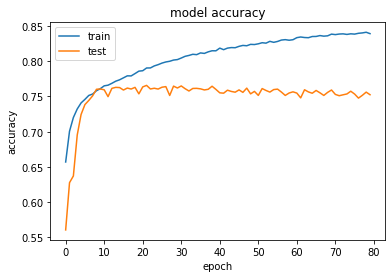

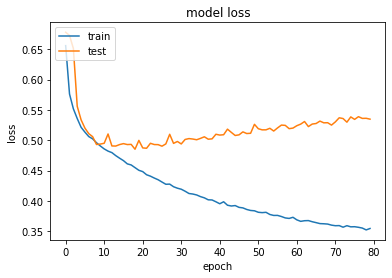

Ende des Versuchs: 


In [8]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Tests

In [9]:
model = tf.keras.models.load_model("Perceptron_LAPPD(1x1)_PID_120k-improvement-val-acc_0.77.model")

W0528 17:57:27.722968 24064 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0528 17:57:27.722968 24064 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0528 17:57:27.722968 24064 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [10]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.47987645894279085
Test accuracy:  0.76754415


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5264 2223]
 [1265 6253]]


[[0.70308535 0.29691465]
 [0.16826284 0.83173716]]


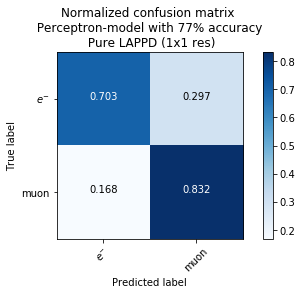

In [13]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 77% accuracy \n Pure LAPPD (1x1 res)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Fuctinal API

In [5]:
#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,LeakyReLU, Activation,ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Concatenate, Reshape, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [6]:
X.shape

(23552, 10, 16, 2)

In [11]:
XCharge= X[:,:,:,0].reshape(23552,10,16,1)
XTime=X[:,:,:,1].reshape(23552,10,16,1)

In [29]:

#### Program

#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"
#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))
inputC = tf.keras.Input(shape=(10,16,1), name='inputC')

xC =layers.Conv2D(130, kernel_size=(5,5), strides=(1, 1),activation ='relu',padding='same')(inputC)
xC =layers.MaxPooling2D(2)(xC)
xC =layers.BatchNormalization()(xC)
xC =layers.Dropout(0.2)(xC)


xC =layers.Conv2D(230, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(xC)
xC =layers.MaxPooling2D(2)(xC)
xC =layers.BatchNormalization()(xC)
xC =layers.Dropout(0.2)(xC)

xC =layers.Conv2D(500, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(xC)
xC =layers.MaxPooling2D(2)(xC)
outputC =layers.BatchNormalization()(xC)
#outputC =layers.Dropout(0.2)(xC)




#### Time



inputT = tf.keras.Input(shape=(10,16,1), name='InputT')

x= layers.Conv2D(150, kernel_size=(5,5), strides=(1, 1),activation ='relu',padding='same')(inputT)
x= layers.MaxPooling2D(2)(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)


x= layers.Conv2D(300, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.MaxPooling2D(2)(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)


x= layers.Conv2D(500, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.MaxPooling2D(2)(x)
outputT= layers.BatchNormalization()(x)
#outputT= layers.Dropout(0.2)(x)




###### Zusammenführung



summary     = layers.concatenate([outputC,outputT])

######

inter= layers.Flatten()(summary)

inter= layers.Dense(658, activation='relu')(inter)
inter= layers.BatchNormalization()(inter)
inter= layers.Dense(200, activation='relu')(inter)
inter= layers.BatchNormalization()(inter)
outputs = layers.Dense(2, activation='softmax')(inter)




model = tf.keras.Model(inputs=[inputC, inputT], outputs=[outputs], name='Test')

model.summary()


#NVIDIA





Model: "Test"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputC (InputLayer)             [(None, 10, 16, 1)]  0                                            
__________________________________________________________________________________________________
InputT (InputLayer)             [(None, 10, 16, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 10, 16, 130)  3380        inputC[0][0]                     
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 10, 16, 150)  3900        InputT[0][0]                     
_______________________________________________________________________________________________

Using TensorFlow backend.


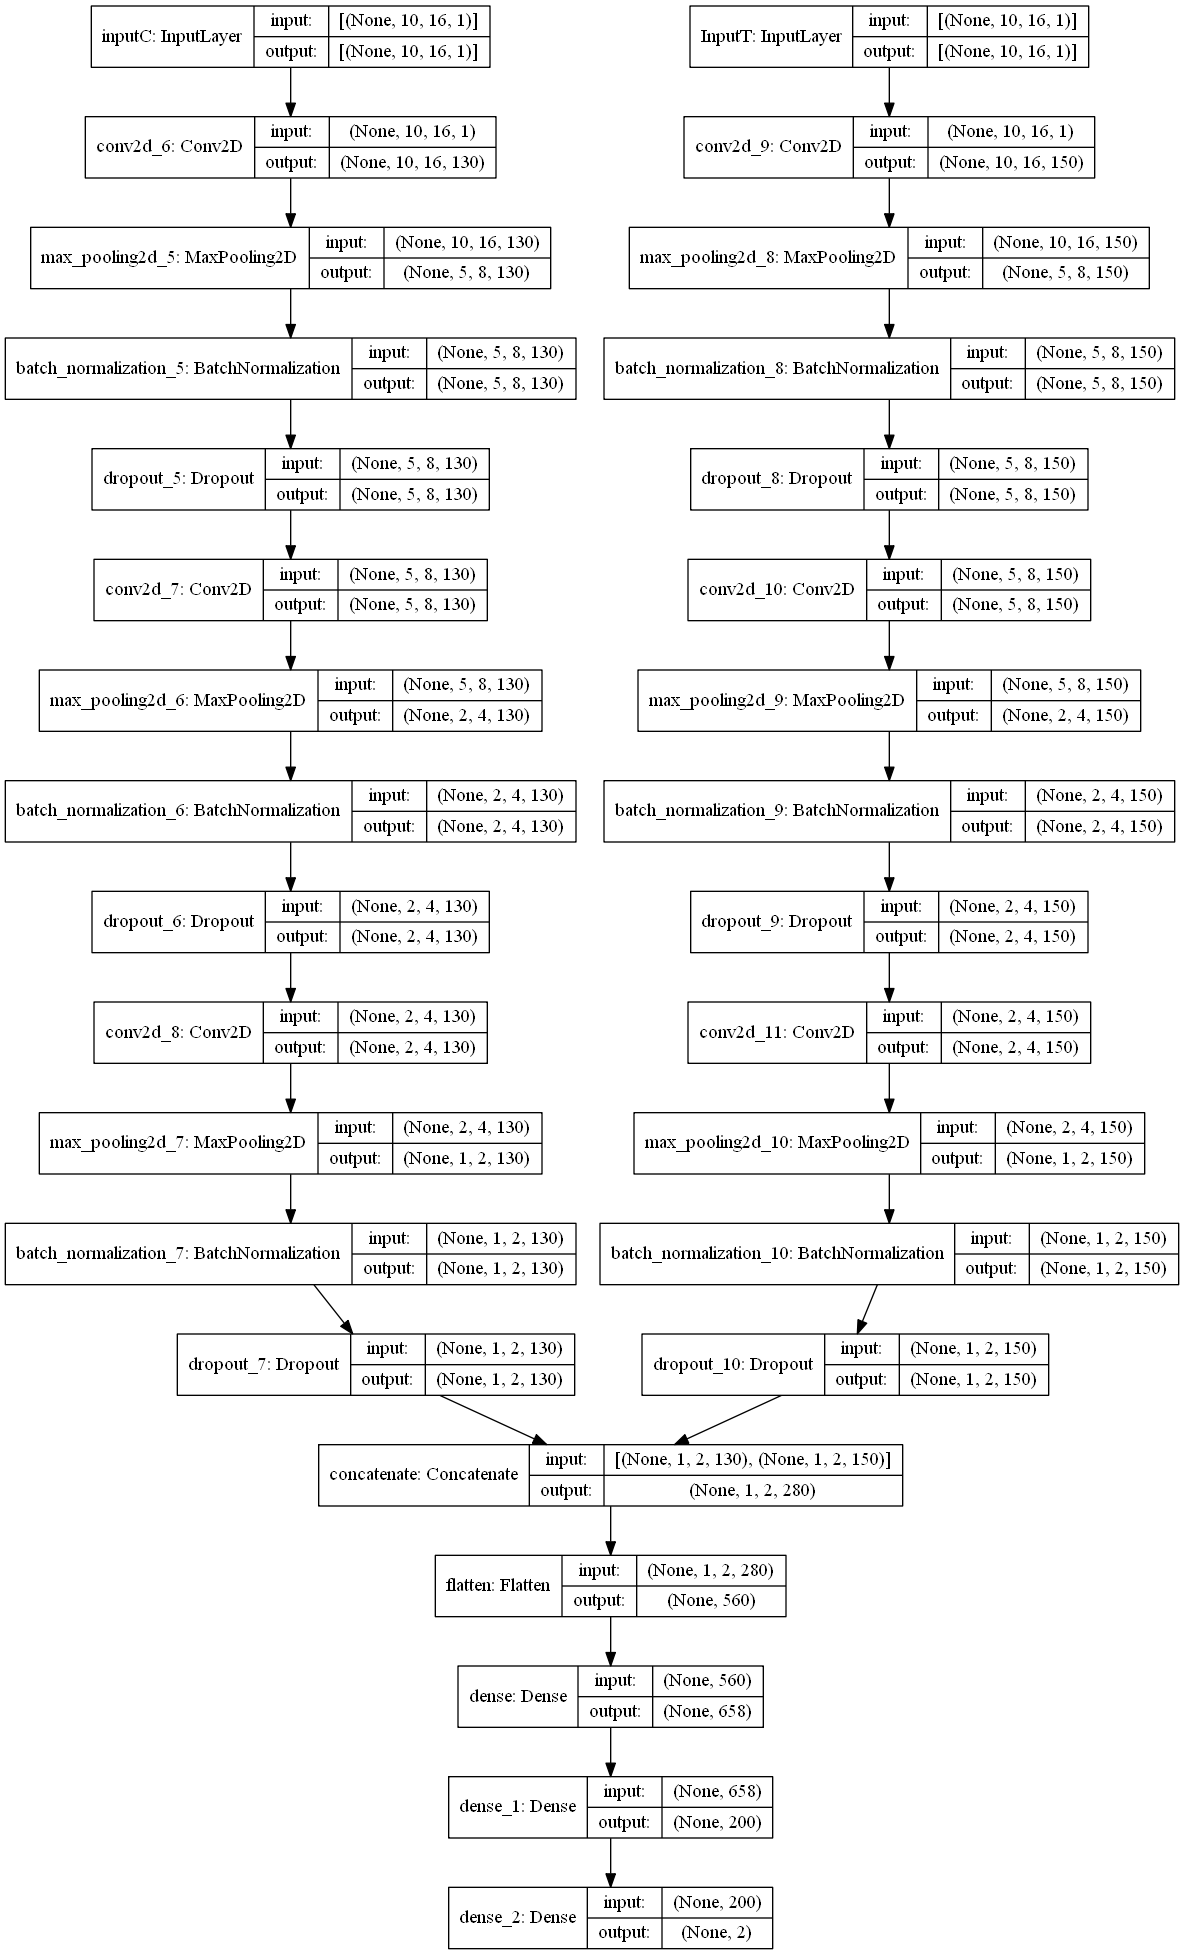

In [10]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
keras.utils.plot_model(model, 'löschen.png', show_shapes=True)

In [12]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,10,16,1)
XTestT = XTest[:,:,:,1].reshape(4052,10,16,1)
XValT = XVal[:,:,:,1].reshape(2500,10,16,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,10,16,1)
XTestC = XTest[:,:,:,0].reshape(4052,10,16,1)
XValC = XVal[:,:,:,0].reshape(2500,10,16,1)

In [15]:
YTraining.shape

(17000, 2)

Train on 17000 samples, validate on 2500 samples
Epoch 1/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.6488 - acc: 0.7450
Epoch 00001: val_acc improved from -inf to 0.53760, saving model to CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_0.54.model
17000/17000 [==============================] - 8s 469us/sample - loss: 0.6333 - acc: 0.7503 - val_loss: 0.6912 - val_acc: 0.5376
Epoch 2/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.2997 - acc: 0.8688
Epoch 00002: val_acc improved from 0.53760 to 0.55120, saving model to CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_0.55.model
17000/17000 [==============================] - 1s 65us/sample - loss: 0.2995 - acc: 0.8684 - val_loss: 0.6887 - val_acc: 0.5512
Epoch 3/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.2441 - acc: 0.8951
Epoch 00003: val_acc improved from 0.55120 to 0.60520, saving model to CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_0.61.m

Epoch 30/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0151 - acc: 0.9944
Epoch 00030: val_acc did not improve from 0.69800
17000/17000 [==============================] - 1s 56us/sample - loss: 0.0152 - acc: 0.9943 - val_loss: 1.6034 - val_acc: 0.6440
Epoch 31/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0118 - acc: 0.9957
Epoch 00031: val_acc did not improve from 0.69800
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0116 - acc: 0.9958 - val_loss: 1.6602 - val_acc: 0.6144
Epoch 32/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0128 - acc: 0.9956
Epoch 00032: val_acc improved from 0.69800 to 0.74320, saving model to CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_0.74.model
17000/17000 [==============================] - 1s 62us/sample - loss: 0.0126 - acc: 0.9958 - val_loss: 0.9063 - val_acc: 0.7432
Epoch 33/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0132 - ac

Epoch 57/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.9971
Epoch 00057: val_acc did not improve from 0.91320
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0074 - acc: 0.9971 - val_loss: 0.4784 - val_acc: 0.9132
Epoch 58/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.9979
Epoch 00058: val_acc did not improve from 0.91320
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0061 - acc: 0.9980 - val_loss: 1.2232 - val_acc: 0.7964
Epoch 59/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.9984
Epoch 00059: val_acc improved from 0.91320 to 0.91640, saving model to CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_0.92.model
17000/17000 [==============================] - 1s 62us/sample - loss: 0.0056 - acc: 0.9982 - val_loss: 0.4490 - val_acc: 0.9164
Epoch 60/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0050 - ac

Epoch 87/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0032 - acc: 0.9989
Epoch 00087: val_acc improved from 0.91640 to 0.91720, saving model to CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_0.92.model
17000/17000 [==============================] - 1s 63us/sample - loss: 0.0033 - acc: 0.9989 - val_loss: 0.5130 - val_acc: 0.9172
Epoch 88/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9989
Epoch 00088: val_acc did not improve from 0.91720
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0028 - acc: 0.9989 - val_loss: 0.6954 - val_acc: 0.8800
Epoch 89/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 0.9986
Epoch 00089: val_acc did not improve from 0.91720
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0035 - acc: 0.9986 - val_loss: 0.5157 - val_acc: 0.9144
Epoch 90/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0031 - ac

Epoch 146/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0018 - acc: 0.9994
Epoch 00146: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0019 - acc: 0.9994 - val_loss: 0.7435 - val_acc: 0.9064
Epoch 147/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0026 - acc: 0.9991
Epoch 00147: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 56us/sample - loss: 0.0025 - acc: 0.9992 - val_loss: 0.5525 - val_acc: 0.9200
Epoch 148/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0026 - acc: 0.9990
Epoch 00148: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 58us/sample - loss: 0.0028 - acc: 0.9989 - val_loss: 0.5533 - val_acc: 0.9156
Epoch 149/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0026 - acc: 0.9992
Epoch 00149: val_acc did not improve from 0.92360
17000/17000 [===========

Epoch 176/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0039 - acc: 0.9987
Epoch 00176: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 56us/sample - loss: 0.0036 - acc: 0.9988 - val_loss: 0.5477 - val_acc: 0.9188
Epoch 177/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9989
Epoch 00177: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0034 - acc: 0.9989 - val_loss: 0.5898 - val_acc: 0.9132
Epoch 178/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0032 - acc: 0.9986
Epoch 00178: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 55us/sample - loss: 0.0034 - acc: 0.9986 - val_loss: 0.5120 - val_acc: 0.9128
Epoch 179/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9989
Epoch 00179: val_acc did not improve from 0.92360
17000/17000 [===========

Epoch 206/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0063 - acc: 0.9979
Epoch 00206: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0061 - acc: 0.9981 - val_loss: 0.7461 - val_acc: 0.9044
Epoch 207/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.9973
Epoch 00207: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 56us/sample - loss: 0.0071 - acc: 0.9974 - val_loss: 0.6451 - val_acc: 0.8948
Epoch 208/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.9973
Epoch 00208: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 56us/sample - loss: 0.0074 - acc: 0.9974 - val_loss: 0.7058 - val_acc: 0.9008
Epoch 209/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.9984
Epoch 00209: val_acc did not improve from 0.92360
17000/17000 [===========

Epoch 236/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0013 - acc: 0.9995
Epoch 00236: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0013 - acc: 0.9995 - val_loss: 0.6037 - val_acc: 0.9116
Epoch 237/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0020 - acc: 0.9993
Epoch 00237: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 58us/sample - loss: 0.0019 - acc: 0.9994 - val_loss: 0.7097 - val_acc: 0.9060
Epoch 238/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0024 - acc: 0.9992
Epoch 00238: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 58us/sample - loss: 0.0022 - acc: 0.9992 - val_loss: 0.6595 - val_acc: 0.9152
Epoch 239/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0019 - acc: 0.9994
Epoch 00239: val_acc did not improve from 0.92360
17000/17000 [===========

Epoch 266/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0027 - acc: 0.9989
Epoch 00266: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 58us/sample - loss: 0.0028 - acc: 0.9989 - val_loss: 1.3299 - val_acc: 0.8532
Epoch 267/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0012 - acc: 0.9996
Epoch 00267: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0017 - acc: 0.9994 - val_loss: 0.8255 - val_acc: 0.9008
Epoch 268/300
15000/17000 [=========================>....] - ETA: 0s - loss: 0.0014 - acc: 0.9995 
Epoch 00268: val_acc did not improve from 0.92360
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0015 - acc: 0.9995 - val_loss: 0.6141 - val_acc: 0.9180
Epoch 269/300
16000/17000 [===========================>..] - ETA: 0s - loss: 0.0016 - acc: 0.9994
Epoch 00269: val_acc did not improve from 0.92360
17000/17000 [==========

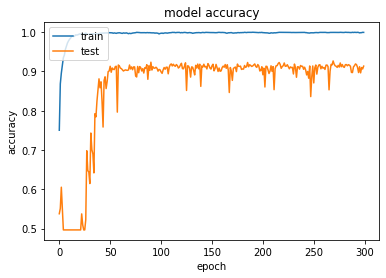

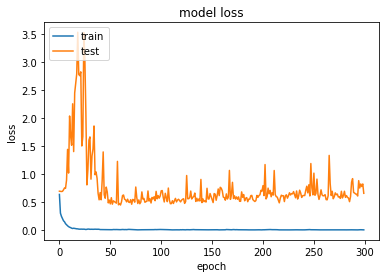

Ende des Versuchs 


In [30]:

#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="CNN_MutiNetwork_PI_PMT_TandC_BIGGER-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)


#model Fit

#print(X.shape)
history = model.fit([XTrainingC,XTrainingT],
                    YTraining,
                    batch_size=1000,
                    #validation_split=0.2,
                    
                    validation_data=([XValC,XValT],Yval),
                    epochs= 300,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs ")

In [34]:
#Test
model = tf.keras.models.load_model("CNN_MutiNetwork_PI_PMT_TandC-improvement-val-acc_0.92.model")
score = model.evaluate([XTestC,XTestT], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2766162261223422
Test accuracy:  0.91880554


# Just Charge

In [69]:
XTraining[:,:,:,0].shape, XTest.shape,XVal.shape

((17000, 10, 16), (4052, 10, 16, 2), (2500, 10, 16, 2))

In [72]:
XTrainingC= XTraining[:,:,:,0].reshape(17000,10,16,1)
XTestC = XTest[:,:,:,0].reshape(4052,10,16,1)
XValC = XVal[:,:,:,0].reshape(2500,10,16,1)

In [75]:
dense_layers = [1,2,3]
layer_sizes = [100,130,150,200]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="JustCharge-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\MuonElectron\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(Dropout(0.4))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(Dropout(0.4))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                #model.add(Dropout(0.5))
            model.add(Dense(32,activation="relu"))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMTOnly_PI_22k_RANDOM-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model.summary()
            history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)
            

            

Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6416 - acc: 0.6194 - val_loss: 0.6116 - val_acc: 0.6476
Epoch 2/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.5502 - acc: 0.7118 - val_loss: 0.5195 - val_acc: 0.7136
Epoch 3/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.4385 - acc: 0.8027 - val_loss: 0.3809 - val_acc: 0.8400
Epoch 4/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.3805 - acc: 0.8348 - val_loss: 0.3446 - val_acc: 0.8576
Epoch 5/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.3469 - acc: 0.8519 - val_loss: 0.3179 - val_acc: 0.8644
Epoch 6/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.3201 - acc: 0.8678 - val_loss: 0.2920 - val_acc: 0.8848
Epoch 7/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.3101 - acc: 0.8715 - val_loss: 0.2

Epoch 29/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1753 - acc: 0.9270 - val_loss: 0.1799 - val_acc: 0.9212
Epoch 30/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1720 - acc: 0.9285 - val_loss: 0.3119 - val_acc: 0.8708
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6654 - acc: 0.5852 - val_loss: 0.6193 - val_acc: 0.6560
Epoch 2/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.5297 - acc: 0.7282 - val_loss: 0.3622 - val_acc: 0.8456
Epoch 3/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3809 - acc: 0.8320 - val_loss: 0.3184 - val_acc: 0.8728
Epoch 4/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3368 - acc: 0.8558 - val_loss: 0.3321 - val_acc: 0.8560
Epoch 5/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3090 - acc: 0.8673 - val_loss: 0

Epoch 27/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1861 - acc: 0.9235 - val_loss: 0.2058 - val_acc: 0.9128
Epoch 28/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1848 - acc: 0.9231 - val_loss: 0.2118 - val_acc: 0.9116
Epoch 29/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1771 - acc: 0.9284 - val_loss: 0.2050 - val_acc: 0.9132
Epoch 30/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1747 - acc: 0.9276 - val_loss: 0.2302 - val_acc: 0.9048
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6510 - acc: 0.6079 - val_loss: 0.5970 - val_acc: 0.6692
Epoch 2/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.5189 - acc: 0.7370 - val_loss: 0.4018 - val_acc: 0.8220
Epoch 3/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3811 - acc: 0.8308 - val_loss:

17000/17000 [==============================] - 1s 51us/sample - loss: 0.1822 - acc: 0.9261 - val_loss: 0.1976 - val_acc: 0.9172
Epoch 23/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1742 - acc: 0.9306 - val_loss: 0.1850 - val_acc: 0.9192
Epoch 24/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1736 - acc: 0.9282 - val_loss: 0.1877 - val_acc: 0.9240
Epoch 25/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1735 - acc: 0.9287 - val_loss: 0.1853 - val_acc: 0.9220
Epoch 26/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.1699 - acc: 0.9309 - val_loss: 0.2025 - val_acc: 0.9132
Epoch 27/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1634 - acc: 0.9355 - val_loss: 0.1893 - val_acc: 0.9180
Epoch 28/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1574 - acc: 0.9355 - val_loss: 0.1932 - val_acc: 0.9140
Epoch 29/30
17000/17000 [=======

17000/17000 [==============================] - 1s 47us/sample - loss: 0.2004 - acc: 0.9143 - val_loss: 0.2232 - val_acc: 0.9084
Epoch 21/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.1937 - acc: 0.9198 - val_loss: 0.2624 - val_acc: 0.8892
Epoch 22/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1886 - acc: 0.9207 - val_loss: 0.2158 - val_acc: 0.9128
Epoch 23/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.1911 - acc: 0.9203 - val_loss: 0.2072 - val_acc: 0.9132
Epoch 24/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.1797 - acc: 0.9247 - val_loss: 0.2141 - val_acc: 0.9160
Epoch 25/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1782 - acc: 0.9243 - val_loss: 0.2561 - val_acc: 0.8936
Epoch 26/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.1729 - acc: 0.9276 - val_loss: 0.2121 - val_acc: 0.9104
Epoch 27/30
17000/17000 [=======

17000/17000 [==============================] - 1s 61us/sample - loss: 0.1766 - acc: 0.9281 - val_loss: 0.1866 - val_acc: 0.9240
Epoch 19/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.1707 - acc: 0.9296 - val_loss: 0.2657 - val_acc: 0.8908
Epoch 20/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.1761 - acc: 0.9265 - val_loss: 0.2080 - val_acc: 0.9048
Epoch 21/30
17000/17000 [==============================] - 1s 65us/sample - loss: 0.1705 - acc: 0.9289 - val_loss: 0.2256 - val_acc: 0.9032
Epoch 22/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.1599 - acc: 0.9362 - val_loss: 0.1843 - val_acc: 0.9204
Epoch 23/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.1630 - acc: 0.9315 - val_loss: 0.1991 - val_acc: 0.9148
Epoch 24/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.1528 - acc: 0.9384 - val_loss: 0.1888 - val_acc: 0.9184
Epoch 25/30
17000/17000 [=======

17000/17000 [==============================] - 1s 53us/sample - loss: 0.2082 - acc: 0.9129 - val_loss: 0.1972 - val_acc: 0.9180
Epoch 17/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2096 - acc: 0.9116 - val_loss: 0.2073 - val_acc: 0.9088
Epoch 18/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2006 - acc: 0.9174 - val_loss: 0.1915 - val_acc: 0.9148
Epoch 19/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2065 - acc: 0.9145 - val_loss: 0.2277 - val_acc: 0.9012
Epoch 20/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2016 - acc: 0.9152 - val_loss: 0.2608 - val_acc: 0.8832
Epoch 21/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.1876 - acc: 0.9219 - val_loss: 0.2561 - val_acc: 0.8884
Epoch 22/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1891 - acc: 0.9219 - val_loss: 0.1914 - val_acc: 0.9196
Epoch 23/30
17000/17000 [=======

17000/17000 [==============================] - 1s 47us/sample - loss: 0.1597 - acc: 0.9352 - val_loss: 0.2249 - val_acc: 0.9052
Epoch 15/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.1640 - acc: 0.9312 - val_loss: 0.2247 - val_acc: 0.9108
Epoch 16/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1487 - acc: 0.9399 - val_loss: 0.2281 - val_acc: 0.9088
Epoch 17/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.1419 - acc: 0.9427 - val_loss: 0.2180 - val_acc: 0.9132
Epoch 18/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.1399 - acc: 0.9430 - val_loss: 0.2381 - val_acc: 0.9084
Epoch 19/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.1306 - acc: 0.9454 - val_loss: 0.2288 - val_acc: 0.9116
Epoch 20/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.1315 - acc: 0.9471 - val_loss: 0.2568 - val_acc: 0.8964
Epoch 21/30
17000/17000 [=======

17000/17000 [==============================] - 1s 61us/sample - loss: 0.2316 - acc: 0.9022 - val_loss: 0.2240 - val_acc: 0.9040
Epoch 13/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2200 - acc: 0.9091 - val_loss: 0.2735 - val_acc: 0.8816
Epoch 14/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2149 - acc: 0.9097 - val_loss: 0.2549 - val_acc: 0.8924
Epoch 15/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2133 - acc: 0.9111 - val_loss: 0.2052 - val_acc: 0.9116
Epoch 16/30
17000/17000 [==============================] - 1s 64us/sample - loss: 0.2121 - acc: 0.9128 - val_loss: 0.2058 - val_acc: 0.9168
Epoch 17/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2036 - acc: 0.9145 - val_loss: 0.1997 - val_acc: 0.9220
Epoch 18/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.2114 - acc: 0.9132 - val_loss: 0.2263 - val_acc: 0.9104
Epoch 19/30
17000/17000 [=======

17000/17000 [==============================] - 1s 61us/sample - loss: 0.2225 - acc: 0.9074 - val_loss: 0.2566 - val_acc: 0.8876
Epoch 11/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.2168 - acc: 0.9078 - val_loss: 0.1965 - val_acc: 0.9204
Epoch 12/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2037 - acc: 0.9135 - val_loss: 0.2142 - val_acc: 0.9128
Epoch 13/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.2022 - acc: 0.9154 - val_loss: 0.1955 - val_acc: 0.9184
Epoch 14/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.1992 - acc: 0.9168 - val_loss: 0.1988 - val_acc: 0.9148
Epoch 15/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.1920 - acc: 0.9198 - val_loss: 0.2068 - val_acc: 0.9096
Epoch 16/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.1968 - acc: 0.9182 - val_loss: 0.2123 - val_acc: 0.9100
Epoch 17/30
17000/17000 [=======

17000/17000 [==============================] - 1s 55us/sample - loss: 0.2255 - acc: 0.9044 - val_loss: 0.2266 - val_acc: 0.9104
Epoch 9/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.2114 - acc: 0.9111 - val_loss: 0.2383 - val_acc: 0.9064
Epoch 10/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1938 - acc: 0.9201 - val_loss: 0.2136 - val_acc: 0.9124
Epoch 11/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1865 - acc: 0.9220 - val_loss: 0.2131 - val_acc: 0.9136
Epoch 12/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1746 - acc: 0.9269 - val_loss: 0.2086 - val_acc: 0.9104
Epoch 13/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.1690 - acc: 0.9301 - val_loss: 0.2151 - val_acc: 0.9112
Epoch 14/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1589 - acc: 0.9352 - val_loss: 0.2099 - val_acc: 0.9192
Epoch 15/30
17000/17000 [========

Epoch 6/30
17000/17000 [==============================] - 1s 69us/sample - loss: 0.2694 - acc: 0.8843 - val_loss: 0.2401 - val_acc: 0.9004
Epoch 7/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.2388 - acc: 0.8981 - val_loss: 0.2324 - val_acc: 0.9008
Epoch 8/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2371 - acc: 0.9000 - val_loss: 0.2561 - val_acc: 0.8856
Epoch 9/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2544 - acc: 0.8952 - val_loss: 0.2733 - val_acc: 0.8816
Epoch 10/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.2166 - acc: 0.9096 - val_loss: 0.2478 - val_acc: 0.8932
Epoch 11/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2158 - acc: 0.9108 - val_loss: 0.2178 - val_acc: 0.9108
Epoch 12/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.2085 - acc: 0.9135 - val_loss: 0.2069 - val_acc: 0.9128
Epoch 13/30
17000/17000 

Epoch 4/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.3337 - acc: 0.8512 - val_loss: 0.2954 - val_acc: 0.8924
Epoch 5/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.3032 - acc: 0.8697 - val_loss: 0.2465 - val_acc: 0.9040
Epoch 6/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2782 - acc: 0.8831 - val_loss: 0.2755 - val_acc: 0.8820
Epoch 7/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2739 - acc: 0.8816 - val_loss: 0.2224 - val_acc: 0.9088
Epoch 8/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2615 - acc: 0.8887 - val_loss: 0.2399 - val_acc: 0.9036
Epoch 9/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2523 - acc: 0.8923 - val_loss: 0.2471 - val_acc: 0.8952
Epoch 10/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2547 - acc: 0.8937 - val_loss: 0.2189 - val_acc: 0.9076
Epoch 11/30
17000/17000 [=

Epoch 2/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.4148 - acc: 0.8110 - val_loss: 0.3737 - val_acc: 0.8224
Epoch 3/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.3123 - acc: 0.8639 - val_loss: 0.2531 - val_acc: 0.8996
Epoch 4/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2816 - acc: 0.8776 - val_loss: 0.2907 - val_acc: 0.8724
Epoch 5/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2544 - acc: 0.8888 - val_loss: 0.2429 - val_acc: 0.8960
Epoch 6/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.2483 - acc: 0.8942 - val_loss: 0.2393 - val_acc: 0.8984
Epoch 7/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2236 - acc: 0.9053 - val_loss: 0.2291 - val_acc: 0.9076
Epoch 8/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2105 - acc: 0.9102 - val_loss: 0.2372 - val_acc: 0.9052
Epoch 9/30
17000/17000 [===

17000/17000 [==============================] - 1s 61us/sample - loss: 0.0832 - acc: 0.9667 - val_loss: 0.2988 - val_acc: 0.9084
Epoch 29/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.0788 - acc: 0.9685 - val_loss: 0.3097 - val_acc: 0.9036
Epoch 30/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.0772 - acc: 0.9691 - val_loss: 0.3021 - val_acc: 0.9020
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 168us/sample - loss: 0.6511 - acc: 0.5996 - val_loss: 0.5724 - val_acc: 0.6848
Epoch 2/30
17000/17000 [==============================] - 1s 69us/sample - loss: 0.4528 - acc: 0.7834 - val_loss: 0.3059 - val_acc: 0.8680
Epoch 3/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.3420 - acc: 0.8515 - val_loss: 0.3366 - val_acc: 0.8552
Epoch 4/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.3103 - acc: 0.8665 - val_loss: 0.2497 - va

17000/17000 [==============================] - 1s 75us/sample - loss: 0.1765 - acc: 0.9272 - val_loss: 0.2215 - val_acc: 0.9048
Epoch 27/30
17000/17000 [==============================] - 1s 78us/sample - loss: 0.1703 - acc: 0.9284 - val_loss: 0.2112 - val_acc: 0.9100
Epoch 28/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1786 - acc: 0.9256 - val_loss: 0.2025 - val_acc: 0.9176
Epoch 29/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.1692 - acc: 0.9302 - val_loss: 0.2722 - val_acc: 0.8804
Epoch 30/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1723 - acc: 0.9265 - val_loss: 0.1897 - val_acc: 0.9200
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.6180 - acc: 0.6468 - val_loss: 0.5155 - val_acc: 0.7392
Epoch 2/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.4001 - acc: 0.8172 - val_loss: 0.3177 - 

17000/17000 [==============================] - 1s 74us/sample - loss: 0.1516 - acc: 0.9385 - val_loss: 0.1906 - val_acc: 0.9164
Epoch 25/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.1500 - acc: 0.9389 - val_loss: 0.2236 - val_acc: 0.9060
Epoch 26/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.1526 - acc: 0.9359 - val_loss: 0.2122 - val_acc: 0.9036
Epoch 27/30
17000/17000 [==============================] - 1s 77us/sample - loss: 0.1479 - acc: 0.9396 - val_loss: 0.2174 - val_acc: 0.9064
Epoch 28/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.1489 - acc: 0.9391 - val_loss: 0.2445 - val_acc: 0.9036
Epoch 29/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1449 - acc: 0.9408 - val_loss: 0.2243 - val_acc: 0.9060
Epoch 30/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1457 - acc: 0.9416 - val_loss: 0.2238 - val_acc: 0.9048
Train on 17000 samples, validate

In [80]:
dense_layers = [2]
layer_sizes = [130]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="JustCharge-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\MuonElectron\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 10, 16, 130)       3380      
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 5, 8, 130)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 5, 8, 130)         520       
_________________________________________________________________
dropout_109 (Dropout)        (None, 5, 8, 130)         0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 5, 8, 130)         152230    
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 3, 4, 130)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 4, 130)       

Train on 17000 samples, validate on 2500 samples
Epoch 1/40
16900/17000 [============================>.] - ETA: 0s - loss: 0.7366 - acc: 0.5891
Epoch 00001: val_acc improved from -inf to 0.50200, saving model to PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.50.model
17000/17000 [==============================] - 11s 668us/sample - loss: 0.7363 - acc: 0.5896 - val_loss: 0.9074 - val_acc: 0.5020
Epoch 2/40
16800/17000 [============================>.] - ETA: 0s - loss: 0.4630 - acc: 0.7756
Epoch 00002: val_acc did not improve from 0.50200
17000/17000 [==============================] - 2s 119us/sample - loss: 0.4615 - acc: 0.7764 - val_loss: 1.1639 - val_acc: 0.4980
Epoch 3/40
16500/17000 [============================>.] - ETA: 0s - loss: 0.3151 - acc: 0.8624
Epoch 00003: val_acc improved from 0.50200 to 0.66480, saving model to PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.66.model
17000/17000 [==============================] - 2s 129us/sample - loss: 0.3146 - acc: 0

Epoch 29/40
16800/17000 [============================>.] - ETA: 0s - loss: 0.1030 - acc: 0.9601
Epoch 00029: val_acc did not improve from 0.92720
17000/17000 [==============================] - 2s 116us/sample - loss: 0.1035 - acc: 0.9601 - val_loss: 0.2576 - val_acc: 0.9020
Epoch 30/40
16800/17000 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9576
Epoch 00030: val_acc did not improve from 0.92720
17000/17000 [==============================] - 2s 121us/sample - loss: 0.1063 - acc: 0.9575 - val_loss: 0.2146 - val_acc: 0.9260
Epoch 31/40
16700/17000 [============================>.] - ETA: 0s - loss: 0.0957 - acc: 0.9618
Epoch 00031: val_acc did not improve from 0.92720
17000/17000 [==============================] - 2s 115us/sample - loss: 0.0968 - acc: 0.9616 - val_loss: 0.2296 - val_acc: 0.9224
Epoch 32/40
16400/17000 [===========================>..] - ETA: 0s - loss: 0.0946 - acc: 0.9622
Epoch 00032: val_acc did not improve from 0.92720
17000/17000 [================

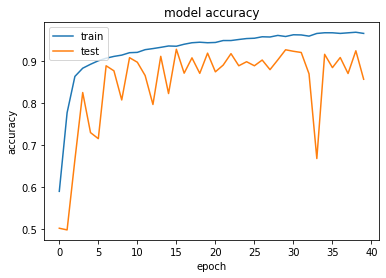

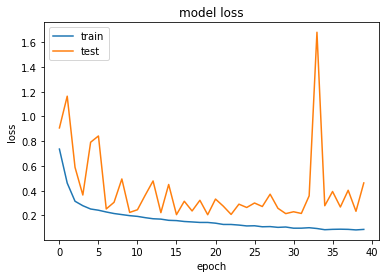

Ende des Versuchs: 


In [81]:
history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Just Time

In [69]:
XTraining[:,:,:,0].shape, XTest.shape,XVal.shape

((17000, 10, 16), (4052, 10, 16, 2), (2500, 10, 16, 2))

In [17]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,10,16,1)
XTestT = XTest[:,:,:,1].reshape(4052,10,16,1)
XValT = XVal[:,:,:,1].reshape(2500,10,16,1)

In [19]:
dense_layers = [1,2,3]
layer_sizes = [100,130,150,200]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="JustTime-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\Time\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingT.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(Dropout(0.4))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(Dropout(0.4))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                #model.add(Dropout(0.5))
            model.add(Dense(32,activation="relu"))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMTOnly_PI_22k_RANDOM-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model.summary()
            history=model.fit(XTrainingT,YTraining,
          validation_data=(XValT,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)
            

            

Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.5897 - acc: 0.6910 - val_loss: 0.5435 - val_acc: 0.7240
Epoch 2/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.5390 - acc: 0.7276 - val_loss: 0.5087 - val_acc: 0.7456
Epoch 3/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.5060 - acc: 0.7512 - val_loss: 0.4890 - val_acc: 0.7592
Epoch 4/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.4920 - acc: 0.7611 - val_loss: 0.4717 - val_acc: 0.7768
Epoch 5/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.4721 - acc: 0.7751 - val_loss: 0.4834 - val_acc: 0.7648
Epoch 6/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.4648 - acc: 0.7763 - val_loss: 0.4533 - val_acc: 0.7800
Epoch 7/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.4563 - acc: 0.7849 - val_loss: 0.4

Epoch 29/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.3270 - acc: 0.8542 - val_loss: 0.4120 - val_acc: 0.8104
Epoch 30/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.3185 - acc: 0.8611 - val_loss: 0.4224 - val_acc: 0.8044
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6199 - acc: 0.6443 - val_loss: 0.5353 - val_acc: 0.7284
Epoch 2/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.5326 - acc: 0.7352 - val_loss: 0.5247 - val_acc: 0.7376
Epoch 3/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.4956 - acc: 0.7617 - val_loss: 0.4718 - val_acc: 0.7784
Epoch 4/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.4759 - acc: 0.7755 - val_loss: 0.4622 - val_acc: 0.7836
Epoch 5/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.4619 - acc: 0.7843 - val_loss: 0

Epoch 27/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.2945 - acc: 0.8695 - val_loss: 0.4732 - val_acc: 0.7740
Epoch 28/30
17000/17000 [==============================] - 1s 38us/sample - loss: 0.2800 - acc: 0.8793 - val_loss: 0.4774 - val_acc: 0.7940
Epoch 29/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.2738 - acc: 0.8805 - val_loss: 0.4594 - val_acc: 0.7952
Epoch 30/30
17000/17000 [==============================] - 1s 38us/sample - loss: 0.2697 - acc: 0.8835 - val_loss: 0.4818 - val_acc: 0.7824
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.5877 - acc: 0.6851 - val_loss: 0.5328 - val_acc: 0.7308
Epoch 2/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.5239 - acc: 0.7391 - val_loss: 0.4935 - val_acc: 0.7576
Epoch 3/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.4956 - acc: 0.7589 - val_loss:

Epoch 25/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.3230 - acc: 0.8575 - val_loss: 0.4181 - val_acc: 0.8112
Epoch 26/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3171 - acc: 0.8625 - val_loss: 0.4135 - val_acc: 0.8108
Epoch 27/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.3189 - acc: 0.8594 - val_loss: 0.4132 - val_acc: 0.8080
Epoch 28/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3087 - acc: 0.8648 - val_loss: 0.4370 - val_acc: 0.8012
Epoch 29/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3089 - acc: 0.8658 - val_loss: 0.4276 - val_acc: 0.8012
Epoch 30/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3054 - acc: 0.8661 - val_loss: 0.4192 - val_acc: 0.8100
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 65us/sample - loss: 0.5873 - acc: 0.6900 - val_los

Epoch 23/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.3077 - acc: 0.8666 - val_loss: 0.4216 - val_acc: 0.8124
Epoch 24/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.2976 - acc: 0.8698 - val_loss: 0.4319 - val_acc: 0.8072
Epoch 25/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.2885 - acc: 0.8759 - val_loss: 0.4243 - val_acc: 0.8044
Epoch 26/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.2837 - acc: 0.8766 - val_loss: 0.4225 - val_acc: 0.8088
Epoch 27/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.2789 - acc: 0.8813 - val_loss: 0.4299 - val_acc: 0.8060
Epoch 28/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.2741 - acc: 0.8803 - val_loss: 0.4356 - val_acc: 0.8064
Epoch 29/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.2660 - acc: 0.8833 - val_loss: 0.4305 - val_acc: 0.8116
Epoch 30/30
17000/17

Epoch 21/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.2750 - acc: 0.8817 - val_loss: 0.4856 - val_acc: 0.7968
Epoch 22/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.2615 - acc: 0.8908 - val_loss: 0.4785 - val_acc: 0.7908
Epoch 23/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.2531 - acc: 0.8919 - val_loss: 0.4830 - val_acc: 0.7952
Epoch 24/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.2441 - acc: 0.8955 - val_loss: 0.4999 - val_acc: 0.7924
Epoch 25/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.2357 - acc: 0.9002 - val_loss: 0.5205 - val_acc: 0.7884
Epoch 26/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.2312 - acc: 0.9024 - val_loss: 0.5033 - val_acc: 0.7928
Epoch 27/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.2217 - acc: 0.9071 - val_loss: 0.5299 - val_acc: 0.7956
Epoch 28/30
17000/17

Epoch 19/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3114 - acc: 0.8633 - val_loss: 0.4207 - val_acc: 0.8108
Epoch 20/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2988 - acc: 0.8687 - val_loss: 0.4409 - val_acc: 0.8080
Epoch 21/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2922 - acc: 0.8743 - val_loss: 0.4472 - val_acc: 0.8116
Epoch 22/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2767 - acc: 0.8811 - val_loss: 0.4227 - val_acc: 0.8116
Epoch 23/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2792 - acc: 0.8812 - val_loss: 0.4381 - val_acc: 0.8068
Epoch 24/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2681 - acc: 0.8811 - val_loss: 0.4390 - val_acc: 0.8044
Epoch 25/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2656 - acc: 0.8861 - val_loss: 0.4463 - val_acc: 0.8060
Epoch 26/30
17000/17

Epoch 17/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3576 - acc: 0.8369 - val_loss: 0.4103 - val_acc: 0.8048
Epoch 18/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3539 - acc: 0.8406 - val_loss: 0.4009 - val_acc: 0.8104
Epoch 19/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3420 - acc: 0.8475 - val_loss: 0.4129 - val_acc: 0.8108
Epoch 20/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3409 - acc: 0.8462 - val_loss: 0.4104 - val_acc: 0.8156
Epoch 21/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3340 - acc: 0.8501 - val_loss: 0.4063 - val_acc: 0.8152
Epoch 22/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3220 - acc: 0.8568 - val_loss: 0.4077 - val_acc: 0.8180
Epoch 23/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3214 - acc: 0.8564 - val_loss: 0.4107 - val_acc: 0.8100
Epoch 24/30
17000/17

17000/17000 [==============================] - 1s 58us/sample - loss: 0.4009 - acc: 0.8171 - val_loss: 0.4289 - val_acc: 0.7976
Epoch 13/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3943 - acc: 0.8211 - val_loss: 0.4133 - val_acc: 0.8080
Epoch 14/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.3943 - acc: 0.8234 - val_loss: 0.4085 - val_acc: 0.8024
Epoch 15/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3849 - acc: 0.8257 - val_loss: 0.4327 - val_acc: 0.7960
Epoch 16/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3790 - acc: 0.8299 - val_loss: 0.4050 - val_acc: 0.8040
Epoch 17/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3787 - acc: 0.8293 - val_loss: 0.4058 - val_acc: 0.8112
Epoch 18/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3656 - acc: 0.8379 - val_loss: 0.4242 - val_acc: 0.7968
Epoch 19/30
17000/17000 [=======

17000/17000 [==============================] - 1s 58us/sample - loss: 0.3904 - acc: 0.8229 - val_loss: 0.4182 - val_acc: 0.8060
Epoch 11/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3839 - acc: 0.8262 - val_loss: 0.4138 - val_acc: 0.8096
Epoch 12/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.3724 - acc: 0.8325 - val_loss: 0.4196 - val_acc: 0.8112
Epoch 13/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.3625 - acc: 0.8391 - val_loss: 0.4139 - val_acc: 0.8104
Epoch 14/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.3530 - acc: 0.8452 - val_loss: 0.4091 - val_acc: 0.8140
Epoch 15/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.3452 - acc: 0.8460 - val_loss: 0.4169 - val_acc: 0.8100
Epoch 16/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.3366 - acc: 0.8504 - val_loss: 0.4133 - val_acc: 0.8096
Epoch 17/30
17000/17000 [=======

17000/17000 [==============================] - 1s 53us/sample - loss: 0.3427 - acc: 0.8502 - val_loss: 0.4378 - val_acc: 0.8008
Epoch 9/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3210 - acc: 0.8609 - val_loss: 0.4525 - val_acc: 0.8024
Epoch 10/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2927 - acc: 0.8714 - val_loss: 0.4555 - val_acc: 0.7960
Epoch 11/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.2599 - acc: 0.8885 - val_loss: 0.4834 - val_acc: 0.8016
Epoch 12/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2403 - acc: 0.8971 - val_loss: 0.4963 - val_acc: 0.7944
Epoch 13/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.2041 - acc: 0.9159 - val_loss: 0.5376 - val_acc: 0.7852
Epoch 14/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.1861 - acc: 0.9234 - val_loss: 0.5340 - val_acc: 0.7936
Epoch 15/30
17000/17000 [========

Epoch 6/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.4267 - acc: 0.8030 - val_loss: 0.4261 - val_acc: 0.8024
Epoch 7/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.4227 - acc: 0.8086 - val_loss: 0.4328 - val_acc: 0.8000
Epoch 8/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.4116 - acc: 0.8115 - val_loss: 0.4403 - val_acc: 0.7952
Epoch 9/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.3988 - acc: 0.8191 - val_loss: 0.4085 - val_acc: 0.8104
Epoch 10/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.3887 - acc: 0.8252 - val_loss: 0.4352 - val_acc: 0.7956
Epoch 11/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.3805 - acc: 0.8275 - val_loss: 0.4118 - val_acc: 0.8028
Epoch 12/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.3738 - acc: 0.8318 - val_loss: 0.4247 - val_acc: 0.8060
Epoch 13/30
17000/17000 

Epoch 4/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.4650 - acc: 0.7781 - val_loss: 0.4394 - val_acc: 0.7940
Epoch 5/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4514 - acc: 0.7898 - val_loss: 0.4321 - val_acc: 0.7956
Epoch 6/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.4392 - acc: 0.7953 - val_loss: 0.4589 - val_acc: 0.7880
Epoch 7/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4265 - acc: 0.7988 - val_loss: 0.4165 - val_acc: 0.8088
Epoch 8/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.4191 - acc: 0.8064 - val_loss: 0.4161 - val_acc: 0.8092
Epoch 9/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.4086 - acc: 0.8124 - val_loss: 0.4485 - val_acc: 0.7864
Epoch 10/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3981 - acc: 0.8148 - val_loss: 0.4080 - val_acc: 0.8132
Epoch 11/30
17000/17000 [=

Epoch 2/30
17000/17000 [==============================] - 1s 54us/sample - loss: 0.5044 - acc: 0.7518 - val_loss: 0.4768 - val_acc: 0.7680
Epoch 3/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.4704 - acc: 0.7734 - val_loss: 0.4637 - val_acc: 0.7752
Epoch 4/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.4462 - acc: 0.7934 - val_loss: 0.4700 - val_acc: 0.7768
Epoch 5/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4207 - acc: 0.8055 - val_loss: 0.4358 - val_acc: 0.7952
Epoch 6/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.4099 - acc: 0.8090 - val_loss: 0.4338 - val_acc: 0.7924
Epoch 7/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3842 - acc: 0.8264 - val_loss: 0.4321 - val_acc: 0.7936
Epoch 8/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.3626 - acc: 0.8364 - val_loss: 0.4548 - val_acc: 0.7920
Epoch 9/30
17000/17000 [===

17000/17000 [==============================] - 1s 59us/sample - loss: 0.0434 - acc: 0.9851 - val_loss: 1.0593 - val_acc: 0.7796
Epoch 29/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0412 - acc: 0.9851 - val_loss: 0.9822 - val_acc: 0.7972
Epoch 30/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0443 - acc: 0.9842 - val_loss: 1.0008 - val_acc: 0.7976
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 149us/sample - loss: 0.5847 - acc: 0.6868 - val_loss: 0.5413 - val_acc: 0.7312
Epoch 2/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.5104 - acc: 0.7489 - val_loss: 0.4700 - val_acc: 0.7736
Epoch 3/30
17000/17000 [==============================] - 1s 65us/sample - loss: 0.4744 - acc: 0.7726 - val_loss: 0.4578 - val_acc: 0.7792
Epoch 4/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.4509 - acc: 0.7891 - val_loss: 0.4375 - va

17000/17000 [==============================] - 1s 75us/sample - loss: 0.3097 - acc: 0.8623 - val_loss: 0.4188 - val_acc: 0.8164
Epoch 27/30
17000/17000 [==============================] - 1s 76us/sample - loss: 0.3067 - acc: 0.8648 - val_loss: 0.4318 - val_acc: 0.8148
Epoch 28/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.3025 - acc: 0.8635 - val_loss: 0.4553 - val_acc: 0.8144
Epoch 29/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.3012 - acc: 0.8665 - val_loss: 0.4245 - val_acc: 0.8212
Epoch 30/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.2956 - acc: 0.8721 - val_loss: 0.4133 - val_acc: 0.8224
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 151us/sample - loss: 0.5658 - acc: 0.6972 - val_loss: 0.4885 - val_acc: 0.7588
Epoch 2/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.4884 - acc: 0.7629 - val_loss: 0.4812 - 

17000/17000 [==============================] - 1s 72us/sample - loss: 0.2204 - acc: 0.9070 - val_loss: 0.4633 - val_acc: 0.8096
Epoch 25/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2152 - acc: 0.9089 - val_loss: 0.4740 - val_acc: 0.8144
Epoch 26/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.2089 - acc: 0.9139 - val_loss: 0.5101 - val_acc: 0.7960
Epoch 27/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.2060 - acc: 0.9141 - val_loss: 0.5247 - val_acc: 0.8024
Epoch 28/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.1903 - acc: 0.9208 - val_loss: 0.5167 - val_acc: 0.8044
Epoch 29/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.1933 - acc: 0.9196 - val_loss: 0.5281 - val_acc: 0.8064
Epoch 30/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.1837 - acc: 0.9249 - val_loss: 0.5293 - val_acc: 0.8028
Train on 17000 samples, validate

In [47]:
dense_layers = [3]
layer_sizes = [150]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="Time-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'BeamlikePI\logs\Time\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingT.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            model.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_224 (Conv2D)          (None, 10, 16, 150)       3900      
_________________________________________________________________
max_pooling2d_224 (MaxPoolin (None, 5, 8, 150)         0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 5, 8, 150)         202650    
_________________________________________________________________
max_pooling2d_225 (MaxPoolin (None, 3, 4, 150)         0         
_________________________________________________________________
dropout_373 (Dropout)        (None, 3, 4, 150)         0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 3, 4, 150)         202650    
_________________________________________________________________
max_pooling2d_226 (MaxPoolin (None, 2, 2, 150)      

Train on 17000 samples, validate on 2500 samples
Epoch 1/40
16700/17000 [============================>.] - ETA: 0s - loss: 0.6002 - acc: 0.7120
Epoch 00001: val_acc improved from -inf to 0.50640, saving model to PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.51.model
17000/17000 [==============================] - 13s 775us/sample - loss: 0.5990 - acc: 0.7127 - val_loss: 1.0977 - val_acc: 0.5064
Epoch 2/40
16900/17000 [============================>.] - ETA: 0s - loss: 0.4967 - acc: 0.7655
Epoch 00002: val_acc did not improve from 0.50640
17000/17000 [==============================] - 2s 131us/sample - loss: 0.4966 - acc: 0.7652 - val_loss: 1.0957 - val_acc: 0.5064
Epoch 3/40
16800/17000 [============================>.] - ETA: 0s - loss: 0.4610 - acc: 0.7823
Epoch 00003: val_acc improved from 0.50640 to 0.50680, saving model to PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.51.model
17000/17000 [==============================] - 2s 135us/sample - loss: 0.4611 - acc: 0.782

Epoch 29/40
16700/17000 [============================>.] - ETA: 0s - loss: 0.0971 - acc: 0.9635
Epoch 00029: val_acc did not improve from 0.80880
17000/17000 [==============================] - 2s 125us/sample - loss: 0.0966 - acc: 0.9638 - val_loss: 0.7440 - val_acc: 0.7892
Epoch 30/40
16700/17000 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9613
Epoch 00030: val_acc did not improve from 0.80880
17000/17000 [==============================] - 2s 126us/sample - loss: 0.0985 - acc: 0.9614 - val_loss: 0.7546 - val_acc: 0.8040
Epoch 31/40
16700/17000 [============================>.] - ETA: 0s - loss: 0.0905 - acc: 0.9649
Epoch 00031: val_acc did not improve from 0.80880
17000/17000 [==============================] - 2s 126us/sample - loss: 0.0911 - acc: 0.9646 - val_loss: 0.7825 - val_acc: 0.8028
Epoch 32/40
16800/17000 [============================>.] - ETA: 0s - loss: 0.0878 - acc: 0.9693
Epoch 00032: val_acc did not improve from 0.80880
17000/17000 [================

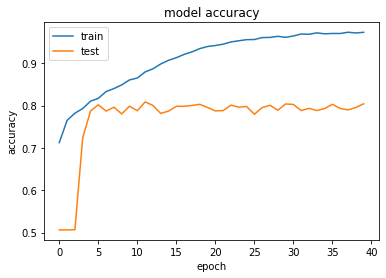

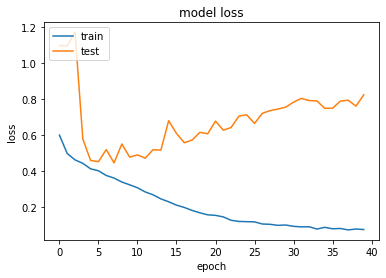

Ende des Versuchs: 


In [30]:
history=model.fit(XTrainingT,YTraining,
          validation_data=(XValT,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Just LAPPD

In [205]:
del XL,YL

In [206]:
XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(1x1)_120k_Files.pickle","rb"))
YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(1x1)_120k_Files.pickle","rb"))

#XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))
#YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))

#XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))
#YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))

#XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/X_Beam_RC_Pure_LAPPD(15x40)_110k_Files.pickle","rb"))
#YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/Y_Beam_RC_globalnorm_PMTandLAPPD5x5_110k_Files_mitTopBottom.pickle","rb"))

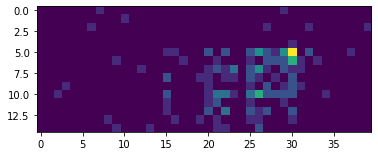

In [193]:
plt.imshow(XL[30,:,:,0], cmap='viridis', interpolation='None')

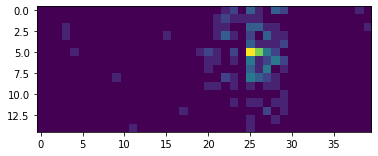

In [169]:
plt.imshow(XL[7,:,:,0], cmap='viridis', interpolation='None')

In [194]:
YL.shape,XL.shape

((120005, 2), (120005, 15, 40, 2))

## 120k Files

In [207]:
training_data = list(zip(XL, YL))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
(85000, 3, 8, 2) (20000, 3, 8, 2) (15005, 3, 8, 2)


## 23 k Files

In [109]:
training_data = list(zip(XL, YL))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:17000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[17000:19500]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[19500:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
(17000, 9, 24, 2) (2500, 9, 24, 2) (4052, 9, 24, 2)


In [73]:
XTraining.shape

(85000, 3, 8, 2)

In [196]:
from sklearn.utils import class_weight
y_ints = [y.argmax() for y in YTrainingnew]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_ints),
                                                 y_ints)

In [197]:
class_weights

array([1., 1.])

In [208]:
YTrainingnew=[]
XTrainingnew=[]
index=index2=index3=0
for i in YTraining:
    
    if i[0]==1 and index2 <35000:
        XTrainingnew.append(XTraining[index])
        YTrainingnew.append(YTraining[index])
        index2=index2+1
        
    if i[1]==1 and index3 <35000:
        XTrainingnew.append(XTraining[index])
        YTrainingnew.append(YTraining[index])
        index3=index3+1
        
    index=index+1

In [209]:
YTrainingnew=np.array(YTrainingnew)
XTrainingnew=np.array(XTrainingnew)

In [210]:
XTrainingnew.shape

(70000, 3, 8, 2)

In [184]:
Yval.shape

(20000, 2)

### val

In [211]:
Yvalnew=[]
XValnew=[]
index=index2=index3=0
for i in Yval:
    
    if i[0]==1 and index2 <7000:
        XValnew.append(XVal[index])
        Yvalnew.append(Yval[index])
        index2=index2+1
        
    if i[1]==1 and index3 <7000:
        XValnew.append(XVal[index])
        Yvalnew.append(Yval[index])
        index3=index3+1
        
    index=index+1
Yvalnew=np.array(Yvalnew)
XValnew=np.array(XValnew)

# Bestes Modell

Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_337 (Conv2D)          (None, 3, 8, 190)         1710      
_________________________________________________________________
max_pooling2d_337 (MaxPoolin (None, 2, 4, 190)         0         
_________________________________________________________________
batch_normalization_579 (Bat (None, 2, 4, 190)         760       
_________________________________________________________________
dropout_579 (Dropout)        (None, 2, 4, 190)         0         
_________________________________________________________________
conv2d_338 (Conv2D)          (None, 2, 4, 190)         144590    
_________________________________________________________________
max_pooling2d_338 (MaxPoolin (None, 1, 2, 190)         0         
_________________________________________________________________
batch_normalization_580 (Bat (None, 1, 2, 190)      

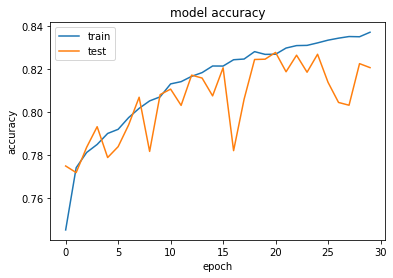

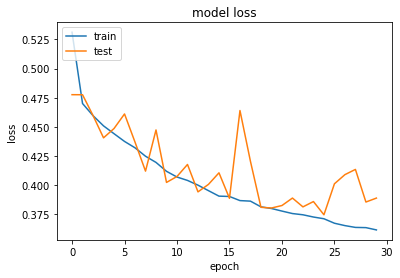

Ende des Versuchs: 


In [212]:
dense_layers = [1]
layer_sizes = [190]
conv_layers = [2]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTsmall\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTrainingnew,YTrainingnew,
              #validation_data=(XVal,Yval)
                 validation_data=(XValnew,Yvalnew)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight=class_weights,
                callbacks=[
                            #monitor,
                            #checkpoint,
                            #tensorboard 
                ],
              epochs= 30)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [204]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  2.3800367363132424
Test accuracy:  0.7064312


In [42]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,9,24,1)
XTestT = XTest[:,:,:,1].reshape(4052,9,24,1)
XValT = XVal[:,:,:,1].reshape(2500,9,24,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,9,24,1)
XTestC = XTest[:,:,:,0].reshape(4052,9,24,1)
XValC = XVal[:,:,:,0].reshape(2500,9,24,1)

In [57]:
dense_layers = [0,1,2,3]
layer_sizes = [15,50,100,150]
conv_layers = [0,1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="LAPPD-Charge-3x3-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(9,9),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            #filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
            #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model.summary()
            history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)
            

Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 207us/sample - loss: 0.6991 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 1s 76us/sample - loss: 0.6944 - acc: 0.4982 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.6936 - acc: 0.5052 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6942 - acc: 0.5001 - val_loss: 0.6970 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6945 - acc: 0.4915 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 6/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6939 - acc: 0.4966 - val_loss: 0.6941 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6937 - acc: 0.4998 - val_loss: 0.

Epoch 29/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6934 - acc: 0.4916 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 30/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6933 - acc: 0.4994 - val_loss: 0.6933 - val_acc: 0.5044
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 239us/sample - loss: 0.7066 - acc: 0.5031 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6946 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 93us/sample - loss: 0.6937 - acc: 0.4988 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 97us/sample - loss: 0.6933 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 5/30
17000/17000 [==============================] - 1s 86us/sample - loss: 0.6933 - acc: 0.4952 - val_loss: 

Epoch 27/30
17000/17000 [==============================] - 2s 96us/sample - loss: 0.6934 - acc: 0.5108 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 28/30
17000/17000 [==============================] - 2s 98us/sample - loss: 0.6939 - acc: 0.4996 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 29/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6938 - acc: 0.4984 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 30/30
17000/17000 [==============================] - 2s 98us/sample - loss: 0.6938 - acc: 0.4954 - val_loss: 0.6933 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 243us/sample - loss: 0.7052 - acc: 0.4984 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 2/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6958 - acc: 0.5006 - val_loss: 0.6938 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6950 - acc: 0.4998 - val_loss

Epoch 25/30
17000/17000 [==============================] - 1s 77us/sample - loss: 0.6936 - acc: 0.4969 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 26/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6937 - acc: 0.4974 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 27/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6935 - acc: 0.4964 - val_loss: 0.6947 - val_acc: 0.5044
Epoch 28/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6936 - acc: 0.4964 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 29/30
17000/17000 [==============================] - 1s 78us/sample - loss: 0.6936 - acc: 0.4974 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 30/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.6938 - acc: 0.5014 - val_loss: 0.7525 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 245us/sample - loss: 0.7076 - acc: 0.5027 - val_lo

Epoch 23/30
17000/17000 [==============================] - 2s 118us/sample - loss: 0.6938 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 24/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.6938 - acc: 0.5021 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 25/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6935 - acc: 0.5018 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 26/30
17000/17000 [==============================] - 2s 101us/sample - loss: 0.6937 - acc: 0.5045 - val_loss: 0.6937 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6935 - acc: 0.5065 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 28/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6940 - acc: 0.4964 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 29/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6937 - acc: 0.4984 - val_loss: 0.6940 - val_acc: 0.4956
Epoch 30/30
170

Epoch 21/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6933 - acc: 0.5017 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 22/30
17000/17000 [==============================] - 1s 81us/sample - loss: 0.6934 - acc: 0.4956 - val_loss: 0.6931 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6934 - acc: 0.5002 - val_loss: 0.6939 - val_acc: 0.4956
Epoch 24/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6933 - acc: 0.5050 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6945 - acc: 0.4974 - val_loss: 0.7704 - val_acc: 0.4956
Epoch 26/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6940 - acc: 0.5003 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 2s 91us/sample - loss: 0.6934 - acc: 0.5026 - val_loss: 0.6939 - val_acc: 0.4956
Epoch 28/30
17000/17

Epoch 19/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6937 - acc: 0.5023 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 20/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6939 - acc: 0.4929 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 21/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6938 - acc: 0.4966 - val_loss: 0.6935 - val_acc: 0.4956
Epoch 22/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6937 - acc: 0.4999 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 23/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6937 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 24/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.6940 - acc: 0.5009 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 2s 105us/sample - loss: 0.6937 - acc: 0.4940 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 26/30
1

Epoch 17/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6935 - acc: 0.4931 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 18/30
17000/17000 [==============================] - 2s 91us/sample - loss: 0.6933 - acc: 0.5038 - val_loss: 0.7379 - val_acc: 0.5044
Epoch 19/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6954 - acc: 0.4933 - val_loss: 0.7100 - val_acc: 0.4956
Epoch 20/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6938 - acc: 0.4959 - val_loss: 0.6967 - val_acc: 0.5044
Epoch 21/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6935 - acc: 0.5035 - val_loss: 0.6939 - val_acc: 0.4956
Epoch 22/30
17000/17000 [==============================] - 2s 96us/sample - loss: 0.6937 - acc: 0.4970 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6936 - acc: 0.5009 - val_loss: 0.6947 - val_acc: 0.5044
Epoch 24/30
17000/17

Epoch 12/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6936 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 13/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.6937 - acc: 0.4912 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 14/30
17000/17000 [==============================] - 1s 79us/sample - loss: 0.6934 - acc: 0.4969 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 15/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6933 - acc: 0.4971 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 16/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.6933 - acc: 0.4984 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 17/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6931 - acc: 0.5067 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 18/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6932 - acc: 0.5030 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 19/30
17000/17

Epoch 10/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6935 - acc: 0.5058 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 11/30
17000/17000 [==============================] - 2s 100us/sample - loss: 0.6941 - acc: 0.5044 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 12/30
17000/17000 [==============================] - 2s 100us/sample - loss: 0.6937 - acc: 0.5033 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 13/30
17000/17000 [==============================] - 2s 112us/sample - loss: 0.6938 - acc: 0.5001 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 14/30
17000/17000 [==============================] - 2s 101us/sample - loss: 0.6943 - acc: 0.4955 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 15/30
17000/17000 [==============================] - 2s 102us/sample - loss: 0.6939 - acc: 0.5021 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 16/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6941 - acc: 0.4959 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 17/30
1

Epoch 8/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6933 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 9/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6935 - acc: 0.4936 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 10/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6933 - acc: 0.5021 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 11/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6935 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 12/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6932 - acc: 0.5068 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 13/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6934 - acc: 0.4941 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 14/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6932 - acc: 0.4985 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 15/30
17000/1700

Epoch 6/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6969 - acc: 0.4962 - val_loss: 0.6939 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6953 - acc: 0.5028 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 8/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6935 - acc: 0.5136 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 9/30
17000/17000 [==============================] - 2s 109us/sample - loss: 0.6944 - acc: 0.4981 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 10/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6942 - acc: 0.4967 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 11/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6941 - acc: 0.4982 - val_loss: 0.6942 - val_acc: 0.4956
Epoch 12/30
17000/17000 [==============================] - 2s 106us/sample - loss: 0.6940 - acc: 0.5012 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 13/30
17000

Epoch 4/30
17000/17000 [==============================] - 2s 91us/sample - loss: 0.6935 - acc: 0.4989 - val_loss: 0.6989 - val_acc: 0.4956
Epoch 5/30
17000/17000 [==============================] - 2s 94us/sample - loss: 0.6936 - acc: 0.4979 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 6/30
17000/17000 [==============================] - 2s 89us/sample - loss: 0.6932 - acc: 0.5038 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6933 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 8/30
17000/17000 [==============================] - 2s 89us/sample - loss: 0.6933 - acc: 0.4985 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 9/30
17000/17000 [==============================] - 2s 93us/sample - loss: 0.6935 - acc: 0.4954 - val_loss: 0.7013 - val_acc: 0.4956
Epoch 10/30
17000/17000 [==============================] - 2s 88us/sample - loss: 0.6935 - acc: 0.4929 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 11/30
17000/17000 [=

Epoch 2/30
17000/17000 [==============================] - 2s 118us/sample - loss: 0.7223 - acc: 0.4937 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 114us/sample - loss: 0.7073 - acc: 0.4971 - val_loss: 0.6945 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 121us/sample - loss: 0.6978 - acc: 0.5068 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6965 - acc: 0.4951 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 6/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6948 - acc: 0.5044 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 2s 117us/sample - loss: 0.6941 - acc: 0.5006 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 8/30
17000/17000 [==============================] - 2s 114us/sample - loss: 0.6935 - acc: 0.5079 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 9/30
17000/170

17000/17000 [==============================] - 2s 100us/sample - loss: 0.6935 - acc: 0.5014 - val_loss: 0.6938 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 6s 345us/sample - loss: 0.7011 - acc: 0.5038 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 2/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6974 - acc: 0.4971 - val_loss: 0.7169 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 96us/sample - loss: 0.6958 - acc: 0.5023 - val_loss: 0.7066 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 97us/sample - loss: 0.6947 - acc: 0.4985 - val_loss: 0.6944 - val_acc: 0.4956
Epoch 5/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6937 - val_acc: 0.4956
Epoch 6/30
17000/17000 [==============================] - 2s 97us/sample - loss: 0.6936 - acc: 0.4969 - val_loss: 0.6931 - va

Epoch 28/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.6938 - acc: 0.4929 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 29/30
17000/17000 [==============================] - 2s 115us/sample - loss: 0.6934 - acc: 0.4954 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 30/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6935 - acc: 0.4964 - val_loss: 0.6937 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 7s 397us/sample - loss: 0.8456 - acc: 0.5011 - val_loss: 0.7070 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 2s 125us/sample - loss: 0.7230 - acc: 0.5063 - val_loss: 0.6995 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 129us/sample - loss: 0.7064 - acc: 0.4990 - val_loss: 0.7119 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 130us/sample - loss: 0.6988 - acc: 0.5005 - val

17000/17000 [==============================] - 2s 123us/sample - loss: 0.6938 - acc: 0.4985 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 2s 119us/sample - loss: 0.6938 - acc: 0.5045 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 24/30
17000/17000 [==============================] - 2s 130us/sample - loss: 0.6938 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 2s 123us/sample - loss: 0.6938 - acc: 0.4984 - val_loss: 0.6937 - val_acc: 0.4956
Epoch 26/30
17000/17000 [==============================] - 2s 125us/sample - loss: 0.6938 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 2s 127us/sample - loss: 0.6937 - acc: 0.5040 - val_loss: 0.6948 - val_acc: 0.5044
Epoch 28/30
17000/17000 [==============================] - 2s 119us/sample - loss: 0.6938 - acc: 0.4970 - val_loss: 0.6945 - val_acc: 0.4956
Epoch 29/30
17000/17000 [

17000/17000 [==============================] - 2s 137us/sample - loss: 0.6939 - acc: 0.5024 - val_loss: 0.6942 - val_acc: 0.4956
Epoch 17/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6938 - acc: 0.5021 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 18/30
17000/17000 [==============================] - 2s 143us/sample - loss: 0.6937 - acc: 0.5009 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 19/30
17000/17000 [==============================] - 2s 131us/sample - loss: 0.6938 - acc: 0.5034 - val_loss: 0.6947 - val_acc: 0.4956
Epoch 20/30
17000/17000 [==============================] - 2s 128us/sample - loss: 0.6941 - acc: 0.4986 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 21/30
17000/17000 [==============================] - 2s 140us/sample - loss: 0.6941 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 22/30
17000/17000 [==============================] - 2s 133us/sample - loss: 0.6938 - acc: 0.4993 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 23/30
17000/17000 [

17000/17000 [==============================] - 2s 142us/sample - loss: 0.6940 - acc: 0.4979 - val_loss: 0.6944 - val_acc: 0.4956
Epoch 11/30
17000/17000 [==============================] - 2s 145us/sample - loss: 0.6940 - acc: 0.4959 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 12/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.6939 - acc: 0.5015 - val_loss: 0.6963 - val_acc: 0.4956
Epoch 13/30
17000/17000 [==============================] - 2s 141us/sample - loss: 0.6940 - acc: 0.4968 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 14/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.6935 - acc: 0.5045 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 15/30
17000/17000 [==============================] - 2s 142us/sample - loss: 0.6939 - acc: 0.4958 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 16/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.6936 - acc: 0.5060 - val_loss: 0.6947 - val_acc: 0.4956
Epoch 17/30
17000/17000 [

17000/17000 [==============================] - 3s 158us/sample - loss: 0.7001 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 3s 155us/sample - loss: 0.6972 - acc: 0.4990 - val_loss: 0.6955 - val_acc: 0.4956
Epoch 6/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6945 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 7/30
17000/17000 [==============================] - 3s 154us/sample - loss: 0.6945 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 8/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6943 - acc: 0.4974 - val_loss: 0.6935 - val_acc: 0.4956
Epoch 9/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6937 - acc: 0.5057 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 10/30
17000/17000 [==============================] - 3s 153us/sample - loss: 0.6941 - acc: 0.4994 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 11/30
17000/17000 [=====

Epoch 29/30
17000/17000 [==============================] - 3s 153us/sample - loss: 0.6938 - acc: 0.5042 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 30/30
17000/17000 [==============================] - 3s 149us/sample - loss: 0.6935 - acc: 0.5039 - val_loss: 0.6932 - val_acc: 0.5044
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 10s 577us/sample - loss: 0.8370 - acc: 0.5039 - val_loss: 0.6956 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.7281 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 3s 163us/sample - loss: 0.7074 - acc: 0.5047 - val_loss: 0.6935 - val_acc: 0.5044
Epoch 4/30
17000/17000 [==============================] - 3s 172us/sample - loss: 0.6991 - acc: 0.5074 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.6966 - acc: 0.5045 - val

17000/17000 [==============================] - 3s 163us/sample - loss: 0.6938 - acc: 0.5028 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 24/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6941 - acc: 0.4956 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 3s 163us/sample - loss: 0.6936 - acc: 0.5042 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 26/30
17000/17000 [==============================] - 3s 164us/sample - loss: 0.6938 - acc: 0.5069 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.6937 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 28/30
17000/17000 [==============================] - 3s 159us/sample - loss: 0.6937 - acc: 0.5027 - val_loss: 0.6944 - val_acc: 0.4956
Epoch 29/30
17000/17000 [==============================] - 3s 162us/sample - loss: 0.6935 - acc: 0.5014 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 30/30
17000/17000 [

17000/17000 [==============================] - 3s 178us/sample - loss: 0.6937 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 18/30
17000/17000 [==============================] - 3s 170us/sample - loss: 0.6939 - acc: 0.4996 - val_loss: 0.6945 - val_acc: 0.5044
Epoch 19/30
17000/17000 [==============================] - 3s 170us/sample - loss: 0.6939 - acc: 0.5026 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 20/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.6938 - acc: 0.4984 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 21/30
17000/17000 [==============================] - 3s 173us/sample - loss: 0.6943 - acc: 0.4976 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 22/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.6938 - acc: 0.4959 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 3s 170us/sample - loss: 0.6938 - acc: 0.5038 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 24/30
17000/17000 [

17000/17000 [==============================] - 3s 183us/sample - loss: 0.6938 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 12/30
17000/17000 [==============================] - 3s 177us/sample - loss: 0.6940 - acc: 0.4991 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 13/30
17000/17000 [==============================] - 3s 182us/sample - loss: 0.6940 - acc: 0.4948 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 14/30
17000/17000 [==============================] - 3s 184us/sample - loss: 0.6943 - acc: 0.4922 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 15/30
17000/17000 [==============================] - 3s 179us/sample - loss: 0.6937 - acc: 0.4966 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 16/30
17000/17000 [==============================] - 3s 183us/sample - loss: 0.6939 - acc: 0.4973 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 17/30
17000/17000 [==============================] - 3s 184us/sample - loss: 0.6942 - acc: 0.4950 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 18/30
17000/17000 [

In [77]:
inputs = tf.keras.Input(shape=XTrainingC.shape[1:], name='img')
x= layers.Flatten()(inputs)

x= layers.BatchNormalization()(x)
x = layers.Dense(150, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x= layers.BatchNormalization()(x)
x = layers.Dense(100, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)


#outputs = layers.Dense(1,activation='sigmoid')(x)
outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs, outputs, name='Model')

model.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_147 (Flatten)        (None, 160)               0         
_________________________________________________________________
batch_normalization_396 (Bat (None, 160)               640       
_________________________________________________________________
dense_364 (Dense)            (None, 150)               24150     
_________________________________________________________________
batch_normalization_397 (Bat (None, 150)               600       
_________________________________________________________________
dropout_429 (Dropout)        (None, 150)               0         
_________________________________________________________________
batch_normalization_398 (Bat (None, 150)               600   

Train on 17000 samples, validate on 2500 samples
Epoch 1/60
17000/17000 [==============================] - 18s 1ms/sample - loss: 0.7725 - acc: 0.5490 - val_loss: 0.6910 - val_acc: 0.5080
Epoch 2/60
17000/17000 [==============================] - 4s 207us/sample - loss: 0.6965 - acc: 0.5804 - val_loss: 0.6971 - val_acc: 0.4972
Epoch 3/60
17000/17000 [==============================] - 4s 208us/sample - loss: 0.6659 - acc: 0.5988 - val_loss: 0.8294 - val_acc: 0.4916
Epoch 4/60
17000/17000 [==============================] - 4s 209us/sample - loss: 0.6433 - acc: 0.6241 - val_loss: 1.2116 - val_acc: 0.4924
Epoch 5/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.6168 - acc: 0.6520 - val_loss: 1.0946 - val_acc: 0.4980
Epoch 6/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.5943 - acc: 0.6675 - val_loss: 1.0440 - val_acc: 0.5052
Epoch 7/60
17000/17000 [==============================] - 4s 210us/sample - loss: 0.5803 - acc: 0.6821 - val_los

Epoch 59/60
17000/17000 [==============================] - 4s 207us/sample - loss: 0.3411 - acc: 0.8453 - val_loss: 0.6283 - val_acc: 0.7140
Epoch 60/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.3342 - acc: 0.8488 - val_loss: 0.6639 - val_acc: 0.7080
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


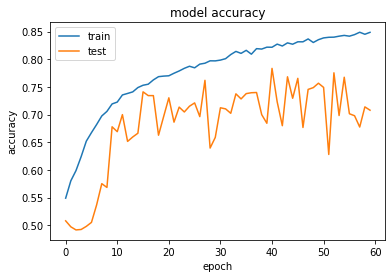

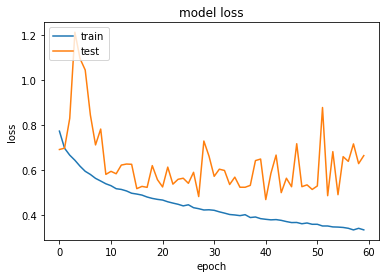

Ende des Versuchs: 


In [78]:
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        #tensorboard 
            ],
          epochs= 60)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [66]:
dense_layers = [0,1,2,3]


#for dense_layer in dense_layers:


NAME ="LAPPD-Charge-3x3-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
tensorboard = TensorBoard(log_dir = 'logs\LAPPDPerceptron\{}'.format(NAME))


model = Sequential()
model.add(Flatten())

for l in range(3):
    model.add(Dense(512-l*50 ,activation="relu" ))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
#model.add(Dense(32,activation="relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

#adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
model.compile(loss="binary_crossentropy",
             optimizer="adam",
              metrics=['accuracy']
             )   
#filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model.summary()
#         history=model.fit(XTrainingC,YTraining,
#       validation_data=(XValC,Yval)
#       ,batch_size=100,
#         shuffle=True,
#         class_weight='balanced',
#         callbacks=[
#                     #monitor,
#                     #checkpoint,
#                     tensorboard 
#         ],
#       epochs= 30)


W0514 14:02:27.200614  2760 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17000 samples, validate on 2500 samples
Epoch 1/40
17000/17000 [==============================] - 4s 258us/sample - loss: 0.8613 - acc: 0.5003 - val_loss: 0.7572 - val_acc: 0.4956
Epoch 2/40
17000/17000 [==============================] - 2s 127us/sample - loss: 0.7364 - acc: 0.4989 - val_loss: 0.7997 - val_acc: 0.4956
Epoch 3/40
17000/17000 [==============================] - 2s 128us/sample - loss: 0.7093 - acc: 0.5022 - val_loss: 0.7038 - val_acc: 0.4956
Epoch 4/40
17000/17000 [==============================] - 2s 127us/sample - loss: 0.7009 - acc: 0.5011 - val_loss: 0.6967 - val_acc: 0.4956
Epoch 5/40
17000/17000 [==============================] - 2s 126us/sample - loss: 0.6969 - acc: 0.4987 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 6/40
17000/17000 [==============================] - 2s 126us/sample - loss: 0.6950 - acc: 0.5035 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 7/40
17000/17000 [==============================] - 2s 133us/sample - loss: 0.6942 - acc: 0.5044 - val_lo

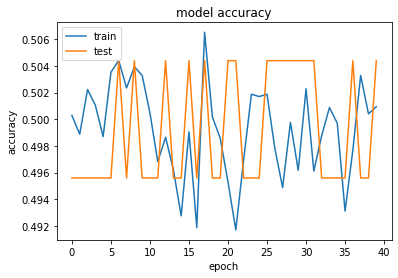

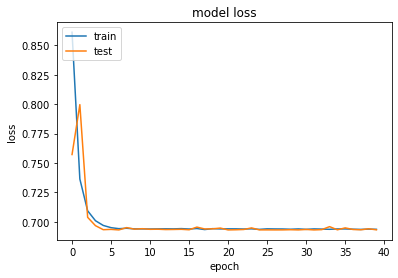

Ende des Versuchs: 


In [44]:
history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# PMT, dass aussieht wie LAPPD

120k Files

In [3]:
XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))
YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))


In [10]:
training_data = list(zip(XL, YL))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
(85000, 3, 8, 2) (20000, 3, 8, 2) (15005, 3, 8, 2)


In [23]:
unique, counts = np.unique(YTest, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [7542 7463]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 49.73675441519494


In [11]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,9,24,1)
XTestT = XTest[:,:,:,1].reshape(4052,9,24,1)
XValT = XVal[:,:,:,1].reshape(2500,9,24,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,9,24,1)
XTestC = XTest[:,:,:,0].reshape(4052,9,24,1)
XValC = XVal[:,:,:,0].reshape(2500,9,24,1)

ValueError: cannot reshape array of size 2040000 into shape (17000,9,24,1)

In [15]:
dense_layers = [0,1,2]
layer_sizes = [15,50,100,150]
conv_layers = [0,1,2,3]
kernal_size = [(2,2),(3,3),(4,4)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTsmall\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XL.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                #filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
                #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                #model.summary()
                history=model.fit(XTraining,YTraining,
              validation_data=(XVal,Yval)
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            #checkpoint,
                            tensorboard 
                ],
              epochs= 30)
            

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 7s 83us/sample - loss: 0.5815 - acc: 0.7127 - val_loss: 0.5033 - val_acc: 0.7552
Epoch 2/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.5126 - acc: 0.7488 - val_loss: 0.4834 - val_acc: 0.7666
Epoch 3/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4986 - acc: 0.7575 - val_loss: 0.4672 - val_acc: 0.7793
Epoch 4/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4870 - acc: 0.7656 - val_loss: 0.4563 - val_acc: 0.7832
Epoch 5/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4793 - acc: 0.7708 - val_loss: 0.4519 - val_acc: 0.7868
Epoch 6/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.4732 - acc: 0.7746 - val_loss: 0.4621 - val_acc: 0.7766
Epoch 7/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.4694 - acc: 0.7769 - val_loss: 0.

Epoch 29/30
85000/85000 [==============================] - 5s 65us/sample - loss: 0.4480 - acc: 0.7911 - val_loss: 0.4333 - val_acc: 0.7964
Epoch 30/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4494 - acc: 0.7893 - val_loss: 0.4258 - val_acc: 0.8053
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.5946 - acc: 0.6962 - val_loss: 0.5144 - val_acc: 0.7466
Epoch 2/30
85000/85000 [==============================] - 6s 75us/sample - loss: 0.5307 - acc: 0.7361 - val_loss: 0.4991 - val_acc: 0.7582
Epoch 3/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.5166 - acc: 0.7468 - val_loss: 0.4862 - val_acc: 0.7652
Epoch 4/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.5066 - acc: 0.7540 - val_loss: 0.4863 - val_acc: 0.7681
Epoch 5/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4992 - acc: 0.7574 - val_loss: 

Epoch 27/30
85000/85000 [==============================] - 7s 82us/sample - loss: 0.4695 - acc: 0.7779 - val_loss: 0.4509 - val_acc: 0.7921
Epoch 28/30
85000/85000 [==============================] - 7s 82us/sample - loss: 0.4675 - acc: 0.7791 - val_loss: 0.4318 - val_acc: 0.8003
Epoch 29/30
85000/85000 [==============================] - 7s 82us/sample - loss: 0.4693 - acc: 0.7776 - val_loss: 0.4398 - val_acc: 0.7959
Epoch 30/30
85000/85000 [==============================] - 7s 81us/sample - loss: 0.4692 - acc: 0.7790 - val_loss: 0.4381 - val_acc: 0.7963
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.5401 - acc: 0.7356 - val_loss: 0.4743 - val_acc: 0.7725
Epoch 2/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4825 - acc: 0.7676 - val_loss: 0.4637 - val_acc: 0.7814
Epoch 3/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4686 - acc: 0.7761 - val_loss

Epoch 25/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4176 - acc: 0.8075 - val_loss: 0.4174 - val_acc: 0.8030
Epoch 26/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4173 - acc: 0.8077 - val_loss: 0.3992 - val_acc: 0.8166
Epoch 27/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4167 - acc: 0.8089 - val_loss: 0.4182 - val_acc: 0.8086
Epoch 28/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4154 - acc: 0.8106 - val_loss: 0.3982 - val_acc: 0.8183
Epoch 29/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4179 - acc: 0.8066 - val_loss: 0.3975 - val_acc: 0.8170
Epoch 30/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4148 - acc: 0.8097 - val_loss: 0.4005 - val_acc: 0.8166
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 99us/sample - loss: 0.5590 - acc: 0.7276 - val_lo

Epoch 23/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4133 - acc: 0.8089 - val_loss: 0.3938 - val_acc: 0.8170
Epoch 24/30
85000/85000 [==============================] - 7s 85us/sample - loss: 0.4145 - acc: 0.8102 - val_loss: 0.3949 - val_acc: 0.8239
Epoch 25/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4133 - acc: 0.8108 - val_loss: 0.3899 - val_acc: 0.8212
Epoch 26/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4108 - acc: 0.8121 - val_loss: 0.3971 - val_acc: 0.8174
Epoch 27/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4112 - acc: 0.8123 - val_loss: 0.3946 - val_acc: 0.8182
Epoch 28/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4088 - acc: 0.8152 - val_loss: 0.3913 - val_acc: 0.8247
Epoch 29/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4110 - acc: 0.8118 - val_loss: 0.3864 - val_acc: 0.8245
Epoch 30/30
85000/85

Epoch 21/30
85000/85000 [==============================] - 5s 65us/sample - loss: 0.4056 - acc: 0.8145 - val_loss: 0.3937 - val_acc: 0.8194
Epoch 22/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4031 - acc: 0.8157 - val_loss: 0.4229 - val_acc: 0.8035
Epoch 23/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4035 - acc: 0.8162 - val_loss: 0.3929 - val_acc: 0.8245
Epoch 24/30
85000/85000 [==============================] - 6s 66us/sample - loss: 0.4016 - acc: 0.8171 - val_loss: 0.3904 - val_acc: 0.8202
Epoch 25/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.3999 - acc: 0.8179 - val_loss: 0.3894 - val_acc: 0.8217
Epoch 26/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4001 - acc: 0.8175 - val_loss: 0.4023 - val_acc: 0.8146
Epoch 27/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.3998 - acc: 0.8173 - val_loss: 0.4003 - val_acc: 0.8159
Epoch 28/30
85000/85

Epoch 19/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3901 - acc: 0.8233 - val_loss: 0.3882 - val_acc: 0.8228
Epoch 20/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3893 - acc: 0.8244 - val_loss: 0.3927 - val_acc: 0.8224
Epoch 21/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3873 - acc: 0.8251 - val_loss: 0.3731 - val_acc: 0.8304
Epoch 22/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3853 - acc: 0.8253 - val_loss: 0.3860 - val_acc: 0.8207
Epoch 23/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3854 - acc: 0.8260 - val_loss: 0.3781 - val_acc: 0.8275
Epoch 24/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3816 - acc: 0.8289 - val_loss: 0.3751 - val_acc: 0.8303
Epoch 25/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3830 - acc: 0.8281 - val_loss: 0.3868 - val_acc: 0.8210
Epoch 26/30
85000/85

Epoch 17/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4012 - acc: 0.8178 - val_loss: 0.3975 - val_acc: 0.8181
Epoch 18/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3988 - acc: 0.8187 - val_loss: 0.3896 - val_acc: 0.8246
Epoch 19/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3981 - acc: 0.8196 - val_loss: 0.3953 - val_acc: 0.8192
Epoch 20/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3976 - acc: 0.8174 - val_loss: 0.3972 - val_acc: 0.8202
Epoch 21/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3964 - acc: 0.8186 - val_loss: 0.4023 - val_acc: 0.8144
Epoch 22/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3972 - acc: 0.8192 - val_loss: 0.3864 - val_acc: 0.8260
Epoch 23/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3970 - acc: 0.8175 - val_loss: 0.3926 - val_acc: 0.8231
Epoch 24/30
85000/85

Epoch 15/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3830 - acc: 0.8281 - val_loss: 0.3846 - val_acc: 0.8235
Epoch 16/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3809 - acc: 0.8274 - val_loss: 0.3758 - val_acc: 0.8304
Epoch 17/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3775 - acc: 0.8293 - val_loss: 0.3894 - val_acc: 0.8235
Epoch 18/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3787 - acc: 0.8300 - val_loss: 0.3930 - val_acc: 0.8202
Epoch 19/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3767 - acc: 0.8309 - val_loss: 0.3764 - val_acc: 0.8309
Epoch 20/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3734 - acc: 0.8320 - val_loss: 0.3709 - val_acc: 0.8307
Epoch 21/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.3716 - acc: 0.8340 - val_loss: 0.3743 - val_acc: 0.8300
Epoch 22/30
85000/85

Epoch 13/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4667 - acc: 0.7789 - val_loss: 0.4387 - val_acc: 0.7957
Epoch 14/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4648 - acc: 0.7810 - val_loss: 0.4367 - val_acc: 0.7936
Epoch 15/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4642 - acc: 0.7794 - val_loss: 0.4398 - val_acc: 0.7937
Epoch 16/30
85000/85000 [==============================] - 6s 70us/sample - loss: 0.4630 - acc: 0.7813 - val_loss: 0.4386 - val_acc: 0.7984
Epoch 17/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4615 - acc: 0.7827 - val_loss: 0.4390 - val_acc: 0.7972
Epoch 18/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4622 - acc: 0.7816 - val_loss: 0.4379 - val_acc: 0.7975
Epoch 19/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4626 - acc: 0.7804 - val_loss: 0.4341 - val_acc: 0.7983
Epoch 20/30
85000/85

Epoch 11/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4864 - acc: 0.7686 - val_loss: 0.4541 - val_acc: 0.7887
Epoch 12/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4832 - acc: 0.7702 - val_loss: 0.4471 - val_acc: 0.7942
Epoch 13/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4800 - acc: 0.7709 - val_loss: 0.4464 - val_acc: 0.7908
Epoch 14/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4790 - acc: 0.7734 - val_loss: 0.4456 - val_acc: 0.7966
Epoch 15/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4776 - acc: 0.7736 - val_loss: 0.4447 - val_acc: 0.7955
Epoch 16/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4789 - acc: 0.7716 - val_loss: 0.4411 - val_acc: 0.7921
Epoch 17/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4771 - acc: 0.7741 - val_loss: 0.4425 - val_acc: 0.7914
Epoch 18/30
85000/85

Epoch 9/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4349 - acc: 0.7979 - val_loss: 0.4314 - val_acc: 0.7965
Epoch 10/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4313 - acc: 0.7996 - val_loss: 0.4157 - val_acc: 0.8059
Epoch 11/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4300 - acc: 0.8012 - val_loss: 0.4165 - val_acc: 0.8064
Epoch 12/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4273 - acc: 0.8022 - val_loss: 0.4111 - val_acc: 0.8077
Epoch 13/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4285 - acc: 0.8027 - val_loss: 0.4088 - val_acc: 0.8105
Epoch 14/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4252 - acc: 0.8027 - val_loss: 0.4158 - val_acc: 0.8092
Epoch 15/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4237 - acc: 0.8041 - val_loss: 0.4098 - val_acc: 0.8098
Epoch 16/30
85000/850

Epoch 7/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4431 - acc: 0.7938 - val_loss: 0.4222 - val_acc: 0.8045
Epoch 8/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4397 - acc: 0.7953 - val_loss: 0.4215 - val_acc: 0.8030
Epoch 9/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4353 - acc: 0.7982 - val_loss: 0.4086 - val_acc: 0.8120
Epoch 10/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4339 - acc: 0.7993 - val_loss: 0.4208 - val_acc: 0.8026
Epoch 11/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.4299 - acc: 0.8011 - val_loss: 0.4035 - val_acc: 0.8158
Epoch 12/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4299 - acc: 0.8002 - val_loss: 0.4044 - val_acc: 0.8108
Epoch 13/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.4251 - acc: 0.8044 - val_loss: 0.4158 - val_acc: 0.8083
Epoch 14/30
85000/85000

Epoch 5/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4386 - acc: 0.7966 - val_loss: 0.4411 - val_acc: 0.7930
Epoch 6/30
85000/85000 [==============================] - 7s 83us/sample - loss: 0.4321 - acc: 0.8001 - val_loss: 0.4130 - val_acc: 0.8097
Epoch 7/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4288 - acc: 0.8021 - val_loss: 0.4106 - val_acc: 0.8105
Epoch 8/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4245 - acc: 0.8037 - val_loss: 0.4201 - val_acc: 0.8061
Epoch 9/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4231 - acc: 0.8053 - val_loss: 0.4115 - val_acc: 0.8084
Epoch 10/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4211 - acc: 0.8062 - val_loss: 0.3976 - val_acc: 0.8194
Epoch 11/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4172 - acc: 0.8081 - val_loss: 0.4095 - val_acc: 0.8097
Epoch 12/30
85000/85000 [

Epoch 3/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4514 - acc: 0.7894 - val_loss: 0.4213 - val_acc: 0.8054
Epoch 4/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4400 - acc: 0.7952 - val_loss: 0.4089 - val_acc: 0.8117
Epoch 5/30
85000/85000 [==============================] - 8s 100us/sample - loss: 0.4285 - acc: 0.8034 - val_loss: 0.4112 - val_acc: 0.8088
Epoch 6/30
85000/85000 [==============================] - 9s 100us/sample - loss: 0.4230 - acc: 0.8052 - val_loss: 0.4004 - val_acc: 0.8175
Epoch 7/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4169 - acc: 0.8086 - val_loss: 0.3969 - val_acc: 0.8170
Epoch 8/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4139 - acc: 0.8107 - val_loss: 0.3985 - val_acc: 0.8134
Epoch 9/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4089 - acc: 0.8132 - val_loss: 0.3922 - val_acc: 0.8205
Epoch 10/30
85000/85000 [

Epoch 1/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.5241 - acc: 0.7454 - val_loss: 0.4647 - val_acc: 0.7796
Epoch 2/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4684 - acc: 0.7776 - val_loss: 0.4421 - val_acc: 0.7929
Epoch 3/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4504 - acc: 0.7879 - val_loss: 0.4938 - val_acc: 0.7603
Epoch 4/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4399 - acc: 0.7953 - val_loss: 0.4288 - val_acc: 0.7993
Epoch 5/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4319 - acc: 0.7982 - val_loss: 0.4201 - val_acc: 0.8044
Epoch 6/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4269 - acc: 0.8020 - val_loss: 0.4231 - val_acc: 0.8065
Epoch 7/30
85000/85000 [==============================] - 7s 79us/sample - loss: 0.4238 - acc: 0.8046 - val_loss: 0.4082 - val_acc: 0.8123
Epoch 8/30
85000/85000 [=

Epoch 27/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4176 - acc: 0.8076 - val_loss: 0.4137 - val_acc: 0.8092
Epoch 28/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4155 - acc: 0.8085 - val_loss: 0.4183 - val_acc: 0.8059
Epoch 29/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4136 - acc: 0.8099 - val_loss: 0.4173 - val_acc: 0.8058
Epoch 30/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4143 - acc: 0.8098 - val_loss: 0.4075 - val_acc: 0.8117
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 12s 143us/sample - loss: 0.5475 - acc: 0.7294 - val_loss: 0.4907 - val_acc: 0.7612
Epoch 2/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4945 - acc: 0.7613 - val_loss: 0.4592 - val_acc: 0.7838
Epoch 3/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4759 - acc: 0.7727 - val_lo

Epoch 25/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4589 - acc: 0.7844 - val_loss: 0.4259 - val_acc: 0.8041
Epoch 26/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4566 - acc: 0.7844 - val_loss: 0.4310 - val_acc: 0.7995
Epoch 27/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4569 - acc: 0.7865 - val_loss: 0.4239 - val_acc: 0.8025
Epoch 28/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4567 - acc: 0.7844 - val_loss: 0.4218 - val_acc: 0.8064
Epoch 29/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4568 - acc: 0.7847 - val_loss: 0.4230 - val_acc: 0.8077
Epoch 30/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4567 - acc: 0.7844 - val_loss: 0.4223 - val_acc: 0.8069
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.6025 - acc: 0.6929 

85000/85000 [==============================] - 10s 112us/sample - loss: 0.4096 - acc: 0.8123 - val_loss: 0.3845 - val_acc: 0.8237
Epoch 20/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.4075 - acc: 0.8144 - val_loss: 0.3941 - val_acc: 0.8197
Epoch 21/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.4075 - acc: 0.8138 - val_loss: 0.4278 - val_acc: 0.8022
Epoch 22/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4068 - acc: 0.8142 - val_loss: 0.3936 - val_acc: 0.8188
Epoch 23/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.4058 - acc: 0.8147 - val_loss: 0.3838 - val_acc: 0.8263
Epoch 24/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4047 - acc: 0.8159 - val_loss: 0.3981 - val_acc: 0.8160
Epoch 25/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4026 - acc: 0.8155 - val_loss: 0.4026 - val_acc: 0.8139
Epoch 26/30
85000/

85000/85000 [==============================] - 10s 116us/sample - loss: 0.3932 - acc: 0.8206 - val_loss: 0.3818 - val_acc: 0.8277
Epoch 14/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3908 - acc: 0.8232 - val_loss: 0.3865 - val_acc: 0.8242
Epoch 15/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3896 - acc: 0.8231 - val_loss: 0.3902 - val_acc: 0.8200
Epoch 16/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3866 - acc: 0.8247 - val_loss: 0.3773 - val_acc: 0.8299
Epoch 17/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3857 - acc: 0.8245 - val_loss: 0.3794 - val_acc: 0.8284
Epoch 18/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3846 - acc: 0.8254 - val_loss: 0.3897 - val_acc: 0.8195
Epoch 19/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3821 - acc: 0.8273 - val_loss: 0.3721 - val_acc: 0.8323
Epoch 20/30
85000/

85000/85000 [==============================] - 10s 121us/sample - loss: 0.4043 - acc: 0.8153 - val_loss: 0.3891 - val_acc: 0.8246
Epoch 8/30
85000/85000 [==============================] - 10s 121us/sample - loss: 0.3991 - acc: 0.8179 - val_loss: 0.3867 - val_acc: 0.8219
Epoch 9/30
85000/85000 [==============================] - 10s 119us/sample - loss: 0.3951 - acc: 0.8200 - val_loss: 0.3907 - val_acc: 0.8191
Epoch 10/30
85000/85000 [==============================] - 10s 122us/sample - loss: 0.3927 - acc: 0.8214 - val_loss: 0.3812 - val_acc: 0.8270
Epoch 11/30
85000/85000 [==============================] - 10s 120us/sample - loss: 0.3879 - acc: 0.8234 - val_loss: 0.3882 - val_acc: 0.8227
Epoch 12/30
85000/85000 [==============================] - 10s 120us/sample - loss: 0.3857 - acc: 0.8250 - val_loss: 0.3852 - val_acc: 0.8242
Epoch 13/30
85000/85000 [==============================] - 10s 121us/sample - loss: 0.3840 - acc: 0.8251 - val_loss: 0.3975 - val_acc: 0.8195
Epoch 14/30
85000/85

Epoch 2/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.5109 - acc: 0.7526 - val_loss: 0.4763 - val_acc: 0.7721
Epoch 3/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.4928 - acc: 0.7634 - val_loss: 0.4664 - val_acc: 0.7786
Epoch 4/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.4849 - acc: 0.7672 - val_loss: 0.4576 - val_acc: 0.7847
Epoch 5/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4775 - acc: 0.7724 - val_loss: 0.4489 - val_acc: 0.7878
Epoch 6/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4690 - acc: 0.7779 - val_loss: 0.4440 - val_acc: 0.7925
Epoch 7/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4624 - acc: 0.7809 - val_loss: 0.4384 - val_acc: 0.7964
Epoch 8/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.4614 - acc: 0.7819 - val_loss: 0.4512 - val_acc: 0.7908
Epoch 9/30
85000/850

Epoch 27/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3983 - acc: 0.8194 - val_loss: 0.3855 - val_acc: 0.8232
Epoch 28/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.3970 - acc: 0.8190 - val_loss: 0.3868 - val_acc: 0.8251
Epoch 29/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.3964 - acc: 0.8204 - val_loss: 0.3889 - val_acc: 0.8243
Epoch 30/30
85000/85000 [==============================] - 8s 95us/sample - loss: 0.3964 - acc: 0.8214 - val_loss: 0.3867 - val_acc: 0.8236
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 16s 188us/sample - loss: 0.5539 - acc: 0.7324 - val_loss: 0.4758 - val_acc: 0.7753
Epoch 2/30
85000/85000 [==============================] - 10s 115us/sample - loss: 0.4762 - acc: 0.7731 - val_loss: 0.5029 - val_acc: 0.7511
Epoch 3/30
85000/85000 [==============================] - 9s 111us/sample - loss: 0.4552 - acc: 0.7864 - val

Epoch 22/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3825 - acc: 0.8284 - val_loss: 0.3830 - val_acc: 0.8261
Epoch 23/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3838 - acc: 0.8270 - val_loss: 0.3974 - val_acc: 0.8177
Epoch 24/30
85000/85000 [==============================] - 8s 96us/sample - loss: 0.3826 - acc: 0.8262 - val_loss: 0.3858 - val_acc: 0.8242
Epoch 25/30
85000/85000 [==============================] - 8s 96us/sample - loss: 0.3800 - acc: 0.8299 - val_loss: 0.3818 - val_acc: 0.8267
Epoch 26/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3792 - acc: 0.8286 - val_loss: 0.3851 - val_acc: 0.8254
Epoch 27/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3806 - acc: 0.8293 - val_loss: 0.3813 - val_acc: 0.8273
Epoch 28/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3792 - acc: 0.8304 - val_loss: 0.3794 - val_acc: 0.8280
Epoch 29/30
85000/85

85000/85000 [==============================] - 9s 101us/sample - loss: 0.3840 - acc: 0.8271 - val_loss: 0.3892 - val_acc: 0.8228
Epoch 17/30
85000/85000 [==============================] - 9s 103us/sample - loss: 0.3805 - acc: 0.8295 - val_loss: 0.4015 - val_acc: 0.8163
Epoch 18/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.3797 - acc: 0.8297 - val_loss: 0.3901 - val_acc: 0.8231
Epoch 19/30
85000/85000 [==============================] - 9s 103us/sample - loss: 0.3795 - acc: 0.8289 - val_loss: 0.3799 - val_acc: 0.8291
Epoch 20/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.3753 - acc: 0.8324 - val_loss: 0.3797 - val_acc: 0.8278
Epoch 21/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.3742 - acc: 0.8303 - val_loss: 0.3785 - val_acc: 0.8314
Epoch 22/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.3736 - acc: 0.8326 - val_loss: 0.3856 - val_acc: 0.8266
Epoch 23/30
85000/85000 [

85000/85000 [==============================] - 9s 102us/sample - loss: 0.4459 - acc: 0.7912 - val_loss: 0.4364 - val_acc: 0.7940
Epoch 11/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4453 - acc: 0.7918 - val_loss: 0.4414 - val_acc: 0.7910
Epoch 12/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4446 - acc: 0.7919 - val_loss: 0.4236 - val_acc: 0.8037
Epoch 13/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4438 - acc: 0.7935 - val_loss: 0.4192 - val_acc: 0.8032
Epoch 14/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4418 - acc: 0.7947 - val_loss: 0.4216 - val_acc: 0.8037
Epoch 15/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.4397 - acc: 0.7962 - val_loss: 0.4233 - val_acc: 0.8019
Epoch 16/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4394 - acc: 0.7958 - val_loss: 0.4205 - val_acc: 0.8037
Epoch 17/30
85000/85000 [

85000/85000 [==============================] - 9s 107us/sample - loss: 0.4453 - acc: 0.7924 - val_loss: 0.4467 - val_acc: 0.7877
Epoch 5/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4374 - acc: 0.7964 - val_loss: 0.4171 - val_acc: 0.8067
Epoch 6/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4306 - acc: 0.8007 - val_loss: 0.4471 - val_acc: 0.7940
Epoch 7/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4252 - acc: 0.8042 - val_loss: 0.4168 - val_acc: 0.8105
Epoch 8/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4206 - acc: 0.8059 - val_loss: 0.4072 - val_acc: 0.8127
Epoch 9/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4177 - acc: 0.8094 - val_loss: 0.3999 - val_acc: 0.8160
Epoch 10/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4157 - acc: 0.8100 - val_loss: 0.4698 - val_acc: 0.7764
Epoch 11/30
85000/85000 [=====

Epoch 29/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.3746 - acc: 0.8321 - val_loss: 0.3806 - val_acc: 0.8260
Epoch 30/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.3728 - acc: 0.8322 - val_loss: 0.3824 - val_acc: 0.8267
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 17s 199us/sample - loss: 0.5298 - acc: 0.7446 - val_loss: 0.4628 - val_acc: 0.7827
Epoch 2/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4661 - acc: 0.7790 - val_loss: 0.4482 - val_acc: 0.7890
Epoch 3/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4470 - acc: 0.7905 - val_loss: 0.4369 - val_acc: 0.7982
Epoch 4/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4355 - acc: 0.7972 - val_loss: 0.4310 - val_acc: 0.8020
Epoch 5/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4268 - acc: 0.8031 - va

85000/85000 [==============================] - 10s 112us/sample - loss: 0.3729 - acc: 0.8337 - val_loss: 0.3809 - val_acc: 0.8284
Epoch 24/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3714 - acc: 0.8329 - val_loss: 0.3884 - val_acc: 0.8241
Epoch 25/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3708 - acc: 0.8341 - val_loss: 0.3885 - val_acc: 0.8220
Epoch 26/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3720 - acc: 0.8334 - val_loss: 0.3881 - val_acc: 0.8260
Epoch 27/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3695 - acc: 0.8336 - val_loss: 0.3839 - val_acc: 0.8258
Epoch 28/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3691 - acc: 0.8338 - val_loss: 0.3738 - val_acc: 0.8321
Epoch 29/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.3674 - acc: 0.8350 - val_loss: 0.3742 - val_acc: 0.8306
Epoch 30/30
85000/

85000/85000 [==============================] - 12s 139us/sample - loss: 0.4157 - acc: 0.8085 - val_loss: 0.4134 - val_acc: 0.8079
Epoch 18/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4168 - acc: 0.8079 - val_loss: 0.4170 - val_acc: 0.8090
Epoch 19/30
85000/85000 [==============================] - 12s 137us/sample - loss: 0.4142 - acc: 0.8096 - val_loss: 0.4212 - val_acc: 0.8084
Epoch 20/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4122 - acc: 0.8108 - val_loss: 0.4037 - val_acc: 0.8166
Epoch 21/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4126 - acc: 0.8108 - val_loss: 0.4054 - val_acc: 0.8150
Epoch 22/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4104 - acc: 0.8114 - val_loss: 0.4061 - val_acc: 0.8145
Epoch 23/30
85000/85000 [==============================] - 12s 137us/sample - loss: 0.4083 - acc: 0.8129 - val_loss: 0.3989 - val_acc: 0.8177
Epoch 24/30
85000/

85000/85000 [==============================] - 12s 141us/sample - loss: 0.3918 - acc: 0.8220 - val_loss: 0.3876 - val_acc: 0.8225
Epoch 12/30
85000/85000 [==============================] - 12s 142us/sample - loss: 0.3892 - acc: 0.8231 - val_loss: 0.4054 - val_acc: 0.8133
Epoch 13/30
85000/85000 [==============================] - 12s 142us/sample - loss: 0.3846 - acc: 0.8257 - val_loss: 0.4032 - val_acc: 0.8139
Epoch 14/30
85000/85000 [==============================] - 12s 141us/sample - loss: 0.3814 - acc: 0.8273 - val_loss: 0.3897 - val_acc: 0.8221
Epoch 15/30
85000/85000 [==============================] - 12s 141us/sample - loss: 0.3752 - acc: 0.8311 - val_loss: 0.4145 - val_acc: 0.8133
Epoch 16/30
85000/85000 [==============================] - 12s 141us/sample - loss: 0.3746 - acc: 0.8320 - val_loss: 0.3919 - val_acc: 0.8222
Epoch 17/30
85000/85000 [==============================] - 12s 142us/sample - loss: 0.3720 - acc: 0.8323 - val_loss: 0.3910 - val_acc: 0.8220
Epoch 18/30
85000/

85000/85000 [==============================] - 12s 145us/sample - loss: 0.4101 - acc: 0.8121 - val_loss: 0.4146 - val_acc: 0.8084
Epoch 6/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.4034 - acc: 0.8170 - val_loss: 0.3968 - val_acc: 0.8195
Epoch 7/30
85000/85000 [==============================] - 12s 144us/sample - loss: 0.3974 - acc: 0.8201 - val_loss: 0.3928 - val_acc: 0.8210
Epoch 8/30
85000/85000 [==============================] - 12s 144us/sample - loss: 0.3897 - acc: 0.8239 - val_loss: 0.4043 - val_acc: 0.8137
Epoch 9/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.3852 - acc: 0.8266 - val_loss: 0.4058 - val_acc: 0.8138
Epoch 10/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.3798 - acc: 0.8292 - val_loss: 0.3904 - val_acc: 0.8220
Epoch 11/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.3758 - acc: 0.8309 - val_loss: 0.3995 - val_acc: 0.8167
Epoch 12/30
85000/8500

85000/85000 [==============================] - 14s 163us/sample - loss: 0.3273 - acc: 0.8557 - val_loss: 0.3826 - val_acc: 0.8289
Epoch 30/30
85000/85000 [==============================] - 14s 164us/sample - loss: 0.3277 - acc: 0.8555 - val_loss: 0.3789 - val_acc: 0.8339
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 24s 277us/sample - loss: 0.5120 - acc: 0.7531 - val_loss: 0.4602 - val_acc: 0.7806
Epoch 2/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4480 - acc: 0.7902 - val_loss: 0.4251 - val_acc: 0.8037
Epoch 3/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4291 - acc: 0.8021 - val_loss: 0.4255 - val_acc: 0.8026
Epoch 4/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4164 - acc: 0.8079 - val_loss: 0.4196 - val_acc: 0.8072
Epoch 5/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4092 - acc: 0.8126 - val_loss

85000/85000 [==============================] - 14s 168us/sample - loss: 0.3101 - acc: 0.8629 - val_loss: 0.3994 - val_acc: 0.8309
Epoch 24/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.3061 - acc: 0.8667 - val_loss: 0.4026 - val_acc: 0.8212
Epoch 25/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.3025 - acc: 0.8686 - val_loss: 0.3943 - val_acc: 0.8295
Epoch 26/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.3005 - acc: 0.8693 - val_loss: 0.3942 - val_acc: 0.8268
Epoch 27/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.2984 - acc: 0.8699 - val_loss: 0.4029 - val_acc: 0.8302
Epoch 28/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.2919 - acc: 0.8725 - val_loss: 0.4178 - val_acc: 0.8237
Epoch 29/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.2924 - acc: 0.8726 - val_loss: 0.4157 - val_acc: 0.8127
Epoch 30/30
85000/

85000/85000 [==============================] - 13s 153us/sample - loss: 0.4386 - acc: 0.7971 - val_loss: 0.4224 - val_acc: 0.8063
Epoch 18/30
85000/85000 [==============================] - 13s 154us/sample - loss: 0.4374 - acc: 0.7979 - val_loss: 0.4150 - val_acc: 0.8080
Epoch 19/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4369 - acc: 0.7984 - val_loss: 0.4222 - val_acc: 0.8032
Epoch 20/30
85000/85000 [==============================] - 13s 154us/sample - loss: 0.4378 - acc: 0.7985 - val_loss: 0.4255 - val_acc: 0.8057
Epoch 21/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4339 - acc: 0.7999 - val_loss: 0.4160 - val_acc: 0.8094
Epoch 22/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4334 - acc: 0.8000 - val_loss: 0.4191 - val_acc: 0.8056
Epoch 23/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4325 - acc: 0.8004 - val_loss: 0.4107 - val_acc: 0.8072
Epoch 24/30
85000/

85000/85000 [==============================] - 13s 158us/sample - loss: 0.3987 - acc: 0.8194 - val_loss: 0.3901 - val_acc: 0.8228
Epoch 12/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.3938 - acc: 0.8226 - val_loss: 0.4015 - val_acc: 0.8191
Epoch 13/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.3924 - acc: 0.8228 - val_loss: 0.3892 - val_acc: 0.8224
Epoch 14/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.3910 - acc: 0.8230 - val_loss: 0.4011 - val_acc: 0.8163
Epoch 15/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.3874 - acc: 0.8246 - val_loss: 0.3878 - val_acc: 0.8195
Epoch 16/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.3849 - acc: 0.8268 - val_loss: 0.3872 - val_acc: 0.8238
Epoch 17/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.3844 - acc: 0.8265 - val_loss: 0.4110 - val_acc: 0.8108
Epoch 18/30
85000/

85000/85000 [==============================] - 14s 165us/sample - loss: 0.4133 - acc: 0.8122 - val_loss: 0.4333 - val_acc: 0.8017
Epoch 6/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.4036 - acc: 0.8161 - val_loss: 0.4044 - val_acc: 0.8130
Epoch 7/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3983 - acc: 0.8196 - val_loss: 0.3944 - val_acc: 0.8213
Epoch 8/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3907 - acc: 0.8227 - val_loss: 0.3905 - val_acc: 0.8249
Epoch 9/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3844 - acc: 0.8282 - val_loss: 0.3860 - val_acc: 0.8251
Epoch 10/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3807 - acc: 0.8293 - val_loss: 0.3846 - val_acc: 0.8265
Epoch 11/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3758 - acc: 0.8318 - val_loss: 0.3777 - val_acc: 0.8273
Epoch 12/30
85000/8500

85000/85000 [==============================] - 13s 156us/sample - loss: 0.2798 - acc: 0.8790 - val_loss: 0.4166 - val_acc: 0.8184
Epoch 30/30
85000/85000 [==============================] - 13s 156us/sample - loss: 0.2781 - acc: 0.8792 - val_loss: 0.4122 - val_acc: 0.8249
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 28s 331us/sample - loss: 0.5186 - acc: 0.7526 - val_loss: 0.4805 - val_acc: 0.7690
Epoch 2/30
85000/85000 [==============================] - 14s 166us/sample - loss: 0.4500 - acc: 0.7912 - val_loss: 0.4238 - val_acc: 0.8020
Epoch 3/30
85000/85000 [==============================] - 14s 167us/sample - loss: 0.4278 - acc: 0.8033 - val_loss: 0.4674 - val_acc: 0.7857
Epoch 4/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.4145 - acc: 0.8118 - val_loss: 0.4152 - val_acc: 0.8105
Epoch 5/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.4040 - acc: 0.8158 - val_loss

85000/85000 [==============================] - 13s 157us/sample - loss: 0.4276 - acc: 0.8020 - val_loss: 0.4115 - val_acc: 0.8088
Epoch 24/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4284 - acc: 0.8034 - val_loss: 0.4047 - val_acc: 0.8152
Epoch 25/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4273 - acc: 0.8028 - val_loss: 0.4042 - val_acc: 0.8137
Epoch 26/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.4271 - acc: 0.8045 - val_loss: 0.4085 - val_acc: 0.8122
Epoch 27/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.4271 - acc: 0.8032 - val_loss: 0.4036 - val_acc: 0.8146
Epoch 28/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4256 - acc: 0.8041 - val_loss: 0.4102 - val_acc: 0.8125
Epoch 29/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4258 - acc: 0.8038 - val_loss: 0.4029 - val_acc: 0.8160
Epoch 30/30
85000/

85000/85000 [==============================] - 14s 163us/sample - loss: 0.3864 - acc: 0.8249 - val_loss: 0.3991 - val_acc: 0.8199
Epoch 18/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3835 - acc: 0.8271 - val_loss: 0.3932 - val_acc: 0.8178
Epoch 19/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3812 - acc: 0.8279 - val_loss: 0.3846 - val_acc: 0.8274
Epoch 20/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3796 - acc: 0.8289 - val_loss: 0.4038 - val_acc: 0.8169
Epoch 21/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3790 - acc: 0.8298 - val_loss: 0.3832 - val_acc: 0.8271
Epoch 22/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3785 - acc: 0.8309 - val_loss: 0.3865 - val_acc: 0.8242
Epoch 23/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3757 - acc: 0.8313 - val_loss: 0.3853 - val_acc: 0.8256
Epoch 24/30
85000/

85000/85000 [==============================] - 14s 162us/sample - loss: 0.3787 - acc: 0.8310 - val_loss: 0.3826 - val_acc: 0.8267
Epoch 12/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3727 - acc: 0.8335 - val_loss: 0.3890 - val_acc: 0.8238
Epoch 13/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3670 - acc: 0.8366 - val_loss: 0.3882 - val_acc: 0.8267
Epoch 14/30
85000/85000 [==============================] - 14s 164us/sample - loss: 0.3653 - acc: 0.8378 - val_loss: 0.3846 - val_acc: 0.8262
Epoch 15/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3600 - acc: 0.8410 - val_loss: 0.3838 - val_acc: 0.8283
Epoch 16/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3569 - acc: 0.8412 - val_loss: 0.3899 - val_acc: 0.8237
Epoch 17/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3530 - acc: 0.8438 - val_loss: 0.3798 - val_acc: 0.8270
Epoch 18/30
85000/

85000/85000 [==============================] - 14s 170us/sample - loss: 0.4066 - acc: 0.8138 - val_loss: 0.4730 - val_acc: 0.7873
Epoch 6/30
85000/85000 [==============================] - 14s 170us/sample - loss: 0.3974 - acc: 0.8193 - val_loss: 0.3960 - val_acc: 0.8206
Epoch 7/30
85000/85000 [==============================] - 14s 170us/sample - loss: 0.3888 - acc: 0.8233 - val_loss: 0.3998 - val_acc: 0.8176
Epoch 8/30
85000/85000 [==============================] - 14s 170us/sample - loss: 0.3835 - acc: 0.8285 - val_loss: 0.3877 - val_acc: 0.8239
Epoch 9/30
85000/85000 [==============================] - 14s 169us/sample - loss: 0.3764 - acc: 0.8319 - val_loss: 0.3992 - val_acc: 0.8178
Epoch 10/30
85000/85000 [==============================] - 14s 169us/sample - loss: 0.3709 - acc: 0.8343 - val_loss: 0.4046 - val_acc: 0.8147
Epoch 11/30
85000/85000 [==============================] - 14s 169us/sample - loss: 0.3653 - acc: 0.8370 - val_loss: 0.3821 - val_acc: 0.8267
Epoch 12/30
85000/8500

85000/85000 [==============================] - 15s 174us/sample - loss: 0.3957 - acc: 0.8191 - val_loss: 0.3996 - val_acc: 0.8162
Epoch 30/30
85000/85000 [==============================] - 15s 174us/sample - loss: 0.3948 - acc: 0.8200 - val_loss: 0.3978 - val_acc: 0.8173
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 33s 383us/sample - loss: 0.5675 - acc: 0.7193 - val_loss: 0.4868 - val_acc: 0.7691
Epoch 2/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.5001 - acc: 0.7584 - val_loss: 0.4666 - val_acc: 0.7786
Epoch 3/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.4845 - acc: 0.7679 - val_loss: 0.4625 - val_acc: 0.7801
Epoch 4/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.4713 - acc: 0.7757 - val_loss: 0.4401 - val_acc: 0.7953
Epoch 5/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.4612 - acc: 0.7844 - val_loss

85000/85000 [==============================] - 15s 179us/sample - loss: 0.3533 - acc: 0.8431 - val_loss: 0.3940 - val_acc: 0.8199
Epoch 23/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3517 - acc: 0.8434 - val_loss: 0.3900 - val_acc: 0.8217
Epoch 24/30
85000/85000 [==============================] - 15s 178us/sample - loss: 0.3465 - acc: 0.8453 - val_loss: 0.3942 - val_acc: 0.8207
Epoch 25/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3441 - acc: 0.8458 - val_loss: 0.4357 - val_acc: 0.8041
Epoch 26/30
85000/85000 [==============================] - 15s 178us/sample - loss: 0.3428 - acc: 0.8467 - val_loss: 0.4059 - val_acc: 0.8156
Epoch 27/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3404 - acc: 0.8468 - val_loss: 0.3993 - val_acc: 0.8231
Epoch 28/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3367 - acc: 0.8504 - val_loss: 0.3918 - val_acc: 0.8241
Epoch 29/30
85000/

Epoch 19/30
85000/85000 [==============================] - 17s 201us/sample - loss: 0.3813 - acc: 0.8286 - val_loss: 0.4035 - val_acc: 0.8142
Epoch 20/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3797 - acc: 0.8285 - val_loss: 0.3898 - val_acc: 0.8209
Epoch 21/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3769 - acc: 0.8301 - val_loss: 0.3826 - val_acc: 0.8250
Epoch 22/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3746 - acc: 0.8324 - val_loss: 0.3909 - val_acc: 0.8209
Epoch 23/30
85000/85000 [==============================] - 17s 201us/sample - loss: 0.3755 - acc: 0.8314 - val_loss: 0.3890 - val_acc: 0.8236
Epoch 24/30
85000/85000 [==============================] - 17s 201us/sample - loss: 0.3720 - acc: 0.8337 - val_loss: 0.3821 - val_acc: 0.8255
Epoch 25/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3727 - acc: 0.8329 - val_loss: 0.3891 - val_acc: 0.8216
Epoch 

85000/85000 [==============================] - 16s 184us/sample - loss: 0.3495 - acc: 0.8442 - val_loss: 0.3886 - val_acc: 0.8252
Epoch 17/30
85000/85000 [==============================] - 16s 185us/sample - loss: 0.3458 - acc: 0.8467 - val_loss: 0.3902 - val_acc: 0.8230
Epoch 18/30
85000/85000 [==============================] - 16s 185us/sample - loss: 0.3398 - acc: 0.8497 - val_loss: 0.3929 - val_acc: 0.8219
Epoch 19/30
85000/85000 [==============================] - 16s 184us/sample - loss: 0.3381 - acc: 0.8508 - val_loss: 0.3901 - val_acc: 0.8281
Epoch 20/30
85000/85000 [==============================] - 16s 184us/sample - loss: 0.3323 - acc: 0.8537 - val_loss: 0.3998 - val_acc: 0.8214
Epoch 21/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.3279 - acc: 0.8548 - val_loss: 0.3957 - val_acc: 0.8217
Epoch 22/30
85000/85000 [==============================] - 16s 184us/sample - loss: 0.3248 - acc: 0.8557 - val_loss: 0.4049 - val_acc: 0.8220
Epoch 23/30
85000/

85000/85000 [==============================] - 16s 186us/sample - loss: 0.3820 - acc: 0.8287 - val_loss: 0.4153 - val_acc: 0.8109
Epoch 10/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.3778 - acc: 0.8314 - val_loss: 0.3977 - val_acc: 0.8198
Epoch 11/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3722 - acc: 0.8334 - val_loss: 0.3950 - val_acc: 0.8206
Epoch 12/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3674 - acc: 0.8352 - val_loss: 0.3951 - val_acc: 0.8184
Epoch 13/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3615 - acc: 0.8380 - val_loss: 0.4103 - val_acc: 0.8140
Epoch 14/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3575 - acc: 0.8418 - val_loss: 0.4233 - val_acc: 0.8038
Epoch 15/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3499 - acc: 0.8451 - val_loss: 0.3888 - val_acc: 0.8266
Epoch 16/30
85000/

Epoch 6/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3993 - acc: 0.8195 - val_loss: 0.4099 - val_acc: 0.8093
Epoch 7/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3920 - acc: 0.8225 - val_loss: 0.4101 - val_acc: 0.8130
Epoch 8/30
85000/85000 [==============================] - 18s 207us/sample - loss: 0.3851 - acc: 0.8272 - val_loss: 0.4086 - val_acc: 0.8133
Epoch 9/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3778 - acc: 0.8309 - val_loss: 0.4004 - val_acc: 0.8152
Epoch 10/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3728 - acc: 0.8317 - val_loss: 0.3942 - val_acc: 0.8205
Epoch 11/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3639 - acc: 0.8370 - val_loss: 0.3962 - val_acc: 0.8235
Epoch 12/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3595 - acc: 0.8399 - val_loss: 0.3830 - val_acc: 0.8270
Epoch 13/3

### Bestes Modell 24-PMT 

Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_294 (Conv2D)          (None, 3, 8, 150)         1350      
_________________________________________________________________
max_pooling2d_294 (MaxPoolin (None, 2, 4, 150)         0         
_________________________________________________________________
batch_normalization_512 (Bat (None, 2, 4, 150)         600       
_________________________________________________________________
dropout_512 (Dropout)        (None, 2, 4, 150)         0         
_________________________________________________________________
conv2d_295 (Conv2D)          (None, 2, 4, 150)         90150     
_________________________________________________________________
max_pooling2d_295 (MaxPoolin (None, 1, 2, 150)         0         
_________________________________________________________________
batch_normalization_513 (Bat (None, 1, 2, 150)      

Epoch 48/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.3522 - acc: 0.8443
Epoch 00048: val_acc did not improve from 0.83415
85000/85000 [==============================] - 16s 185us/sample - loss: 0.3522 - acc: 0.8443 - val_loss: 0.3820 - val_acc: 0.8255
Epoch 49/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.3512 - acc: 0.8431- ETA: 0s - loss: 0.3516 - acc: 0.8
Epoch 00049: val_acc did not improve from 0.83415
85000/85000 [==============================] - 17s 199us/sample - loss: 0.3513 - acc: 0.8430 - val_loss: 0.3698 - val_acc: 0.8325
Epoch 50/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.3507 - acc: 0.8442
Epoch 00050: val_acc improved from 0.83415 to 0.83505, saving model to PMT_24_PID_120k-improvement-val-acc_0.84.model
85000/85000 [==============================] - 16s 191us/sample - loss: 0.3507 - acc: 0.8441 - val_loss: 0.3676 - val_acc: 0.8350
Epoch 51/80
84700/85000 [============================>.] - ETA: 0s - 

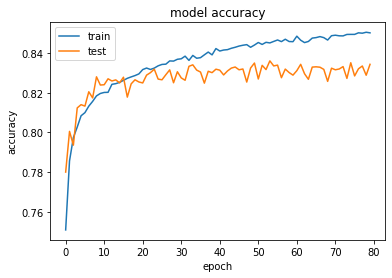

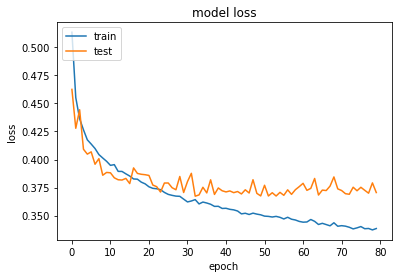

Ende des Versuchs: 


In [18]:
dense_layers = [1]
layer_sizes = [150]
conv_layers = [2]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTsmall\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XL.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="PMT_24_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(XTraining,YTraining,
              validation_data=(XVal,Yval)
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [19]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.3565329247734937
Test accuracy:  0.83852047


# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

tensorboard --logdir=logs/MuonElectron --host localhost --port 8088

tensorboard --logdir=BeamlikePI/logs/Time --host localhost --port 8088

# Evaluate

In [67]:
XTest.shape

(15005, 10, 16, 2)

In [82]:
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()

In [30]:
model = tf.keras.models.load_model("PMT_24_PID_120k-improvement-val-acc_0.84.model")

W0521 13:34:22.750493  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.766009  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.781656  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [77]:
#LAPPD
model = tf.keras.models.load_model("LAPPD(1x1)_PID_120k-improvement-val-acc_0.83.model")

#Combined
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_120k-60epoch_-improvement-val-acc_0.93.model")
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_22k-80epoch-improvement-val-acc_0.92.model")
#Time
#model = tf.keras.models.load_model("PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.81.model")
#Charge
#model = tf.keras.models.load_model("PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.93.model")

In [6]:
len(X)

120005

In [8]:
XTestC = X[:,:,:,0].reshape(120005,10,16,1)

In [12]:

print(XTestC.shape,Y.shape)
for sample in Y[:20]:
    print(sample)

(120005, 10, 16, 1) (120005, 2)
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]


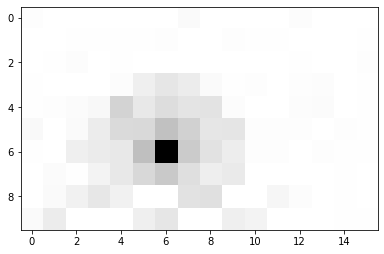

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

## Combined

In [78]:
### LAPPD
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.36467623370204594
Test accuracy:  0.8353882


In [56]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.35680383114329917
Test accuracy:  0.90992105


## Charge

In [13]:
score = model.evaluate(XTestC, Y, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23812034977390828
Test accuracy:  0.90469563


In [85]:
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.19774321766031458
Test accuracy:  0.92719644


## Time

In [33]:
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4832646434304745
Test accuracy:  0.8005923


# Confusion matrix


In [79]:

#prediction = model.predict(XTestC)
#print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5818 1629]
 [ 841 6717]]


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## LAPPD

[[0.7812542  0.2187458 ]
 [0.11127282 0.88872718]]


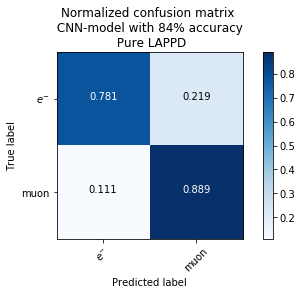

In [80]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n Pure LAPPD')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

## ALL PMTS

[[0.90041109 0.09958891]
 [0.03416399 0.96583601]]


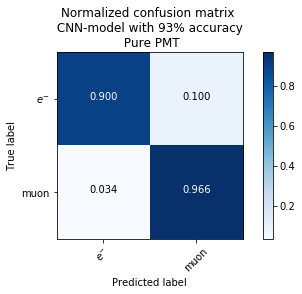

In [58]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93% accuracy \n Pure PMT')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# 24 PMTs

In [62]:
cm2=[[0.79498861,0.20501139],
 [0.11230443,0.88769557]]

[[0.79498861 0.20501139]
 [0.11230443 0.88769557]]


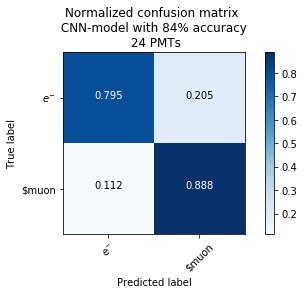

In [81]:
# Reshape into 2 x 2 matrix
#cm = cm.reshape((2,2))
cm2=np.array(cm2)
class_names = [r"$e^{-}$", "$muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n 24 PMTs')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [45]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


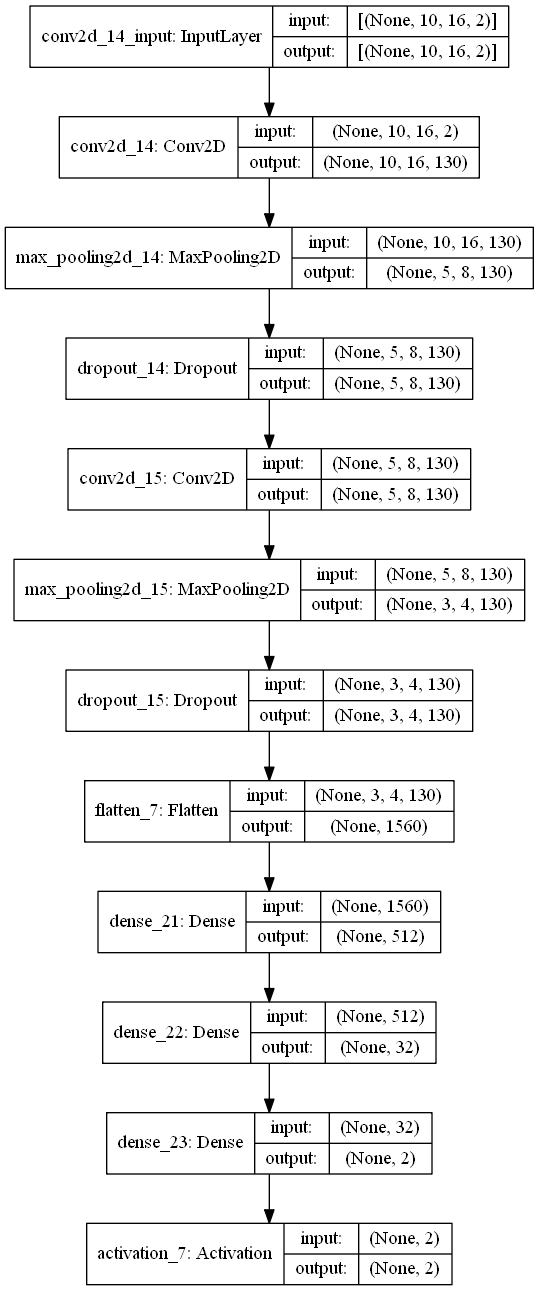

In [46]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


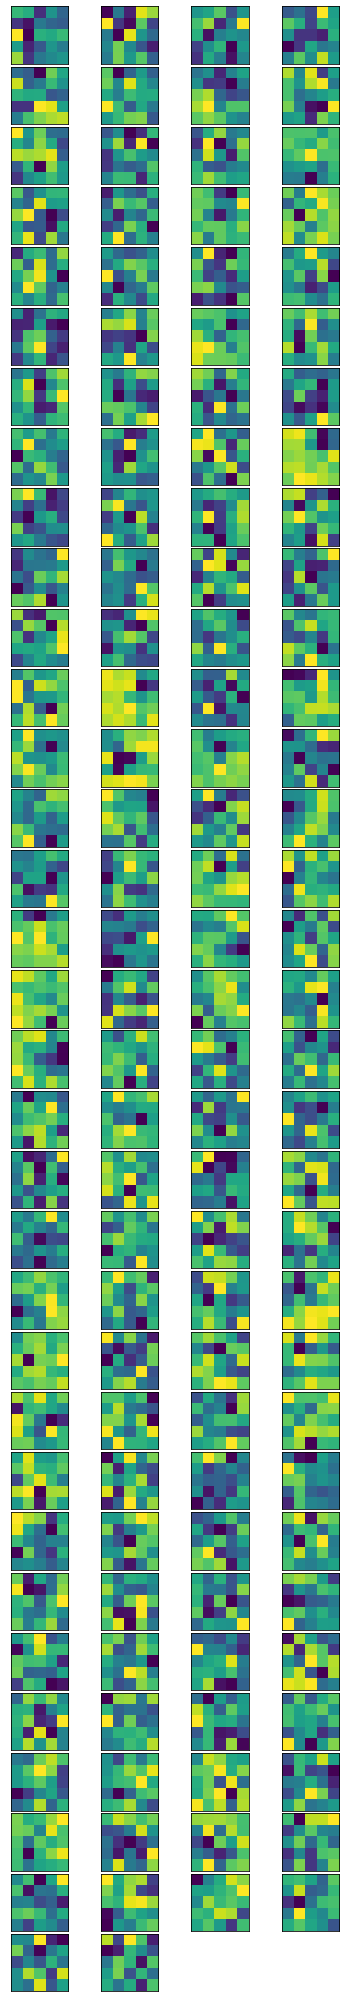

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


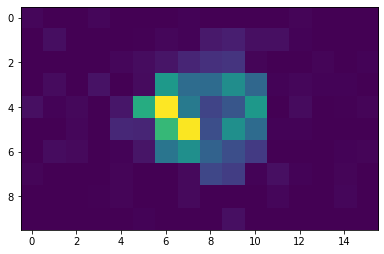

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

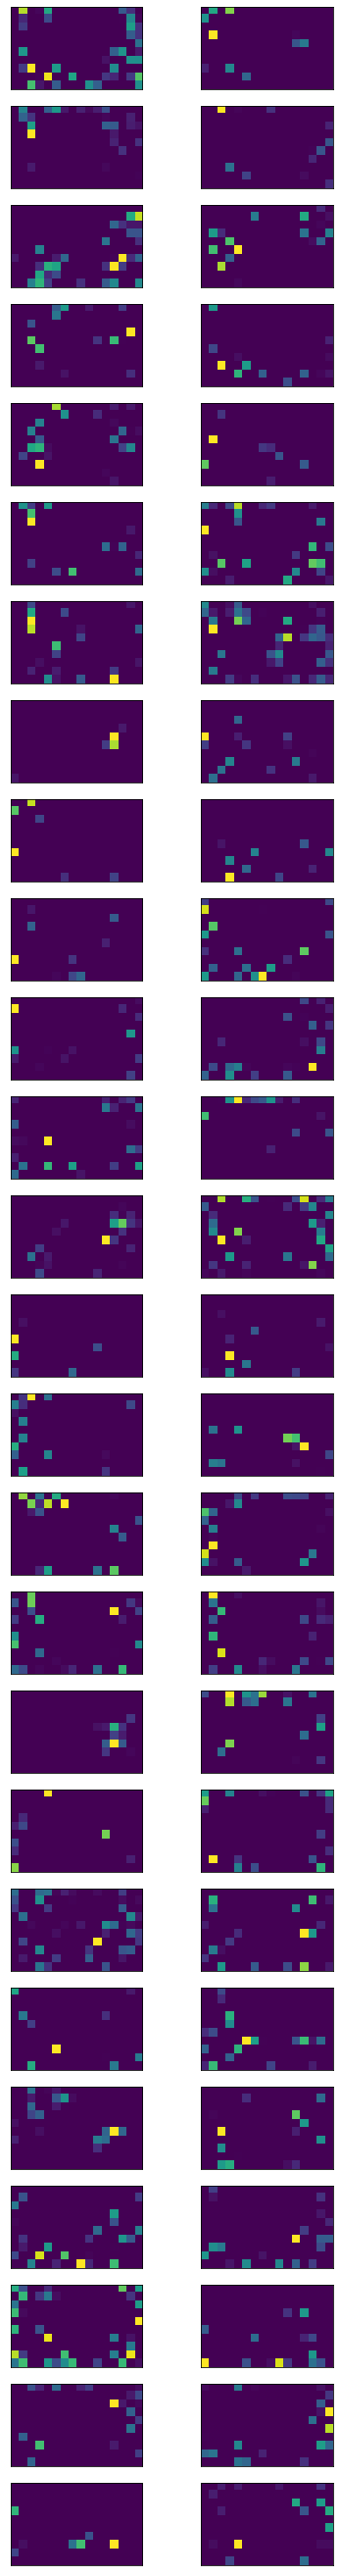

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
